In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [2]:
# Define constants and get matchup scores

LEAGUE_ID = 319300
YEAR = 2021
BASE_URL = "https://fantasy.espn.com/apis/v3/games/ffl/seasons/{}/segments/0/leagues/{}".format(YEAR, LEAGUE_ID)

w = requests.get(BASE_URL).json()
REG_SEASON_WEEK = min(w["status"]["currentMatchupPeriod"], 14)

r = requests.get(BASE_URL, params={"view": "mMatchup", "view": "mMatchupScore"}).json()

In [3]:
# Get team names and store in map

t = requests.get(BASE_URL, params={"view": "mTeam"}).json()
teams = t["teams"]

team_map = {}
for i in range(len(teams)):
    team_map[teams[i]["id"]] = {"name": teams[i]["location"] + ' ' + teams[i]["nickname"]}

In [4]:
# Create dataframes

scores, margins = {}, {}
for i in range(1,11):
    scores[i] = []
    margins[i] = []

for game in r["schedule"][:REG_SEASON_WEEK * 5]:
    scores[game["home"]["teamId"]].append(game['home']['totalPoints'])
    scores[game["away"]["teamId"]].append(game["away"]["totalPoints"])
    margins[game["home"]["teamId"]].append(game['home']['totalPoints'] - game['away']['totalPoints'])
    margins[game["away"]["teamId"]].append(game['away']['totalPoints'] - game['home']['totalPoints'])
    
col_hdrs = ["Week{}".format(i) for i in range(1,REG_SEASON_WEEK+1)]

scores_df = pd.DataFrame.from_dict(scores, orient='index', columns=col_hdrs)
margins_df = pd.DataFrame.from_dict(margins, orient='index', columns=col_hdrs)

for col in scores_df:
    m = scores_df[col].median()
    scores_df[col] = scores_df[col].apply(lambda x: x - m)

In [5]:
margins_df

,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14
1,-10.64,43.28,63.54,24.66,63.82,73.04,-34.88,-108.96,5.90,-18.36,9.82,12.34,-62.56,-23.04
2,34.52,-80.44,-63.54,-8.18,29.64,-21.06,16.44,14.62,-7.98,76.00,41.20,-12.34,21.34,24.72
3,-10.56,-35.06,28.80,-24.66,75.08,-13.56,70.22,21.14,7.98,29.40,71.74,28.52,62.56,36.22
4,24.32,54.74,-65.96,-7.72,-29.64,13.56,-32.78,-0.08,-5.90,13.08,6.54,-6.24,13.92,-24.72
5,10.64,-11.30,65.96,17.50,38.12,21.06,-70.22,77.20,16.36,18.36,-73.84,6.24,27.12,62.72
6,10.56,-54.74,-57.54,-17.50,-86.78,26.36,34.88,-14.62,-7.02,-29.40,-6.54,-19.20,-27.12,2.78
7,-24.32,11.30,74.60,8.18,-75.08,58.08,6.36,108.96,7.02,-13.08,73.84,20.82,-21.34,-36.22
8,19.88,-43.28,-74.60,7.72,-38.12,-26.36,-16.44,-21.14,3.70,-43.38,-9.82,-20.82,-13.92,-62.72
9,-34.52,35.06,57.54,-21.90,-63.82,-58.08,32.78,-77.20,-3.70,-76.00,-71.74,19.20,16.16,23.04
10,-19.88,80.44,-28.80,21.90,86.78,-73.04,-6.36,0.08,-16.36,43.38,-41.20,-28.52,-16.16,-2.78


In [6]:
scores_df

,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14
1,-14.52,20.62,56.92,19.75,68.92,37.09,-36.27,-58.80,6.61,-5.45,18.29,5.39,-21.44,-15.74
2,43.82,-53.28,-6.62,21.79,10.00,-13.71,-11.27,21.66,6.07,40.03,31.61,-6.95,36.10,9.44
3,3.88,-29.60,15.18,-4.91,69.98,24.67,59.55,5.32,14.05,6.13,52.07,12.33,41.12,67.30
4,17.14,-3.08,-9.54,-39.09,-19.64,38.23,1.39,-5.40,0.71,5.45,-23.13,2.89,-0.10,-15.28
5,-3.88,3.08,56.42,4.91,-30.14,7.35,-10.67,62.54,-1.75,12.91,-8.47,9.13,0.10,55.42
6,14.44,-57.82,-50.92,-12.59,-22.46,-7.35,-1.39,7.04,-16.19,-23.27,-29.67,-28.45,-27.02,-19.62
7,-7.18,14.38,35.86,29.97,-5.10,32.09,40.23,50.16,-9.17,-7.63,65.37,17.93,14.76,31.08
8,-14.90,-22.66,-38.74,-31.37,-68.26,-33.71,-27.71,-15.82,2.99,-29.99,8.47,-2.89,-14.02,-7.30
9,9.30,5.46,6.62,-8.03,5.10,-25.99,34.17,-14.66,-0.71,-35.97,-19.67,-9.25,12.46,7.30
10,-34.78,27.16,-13.62,13.87,64.32,-35.95,33.87,-5.32,-18.11,13.39,-9.59,-16.19,-3.70,-22.40


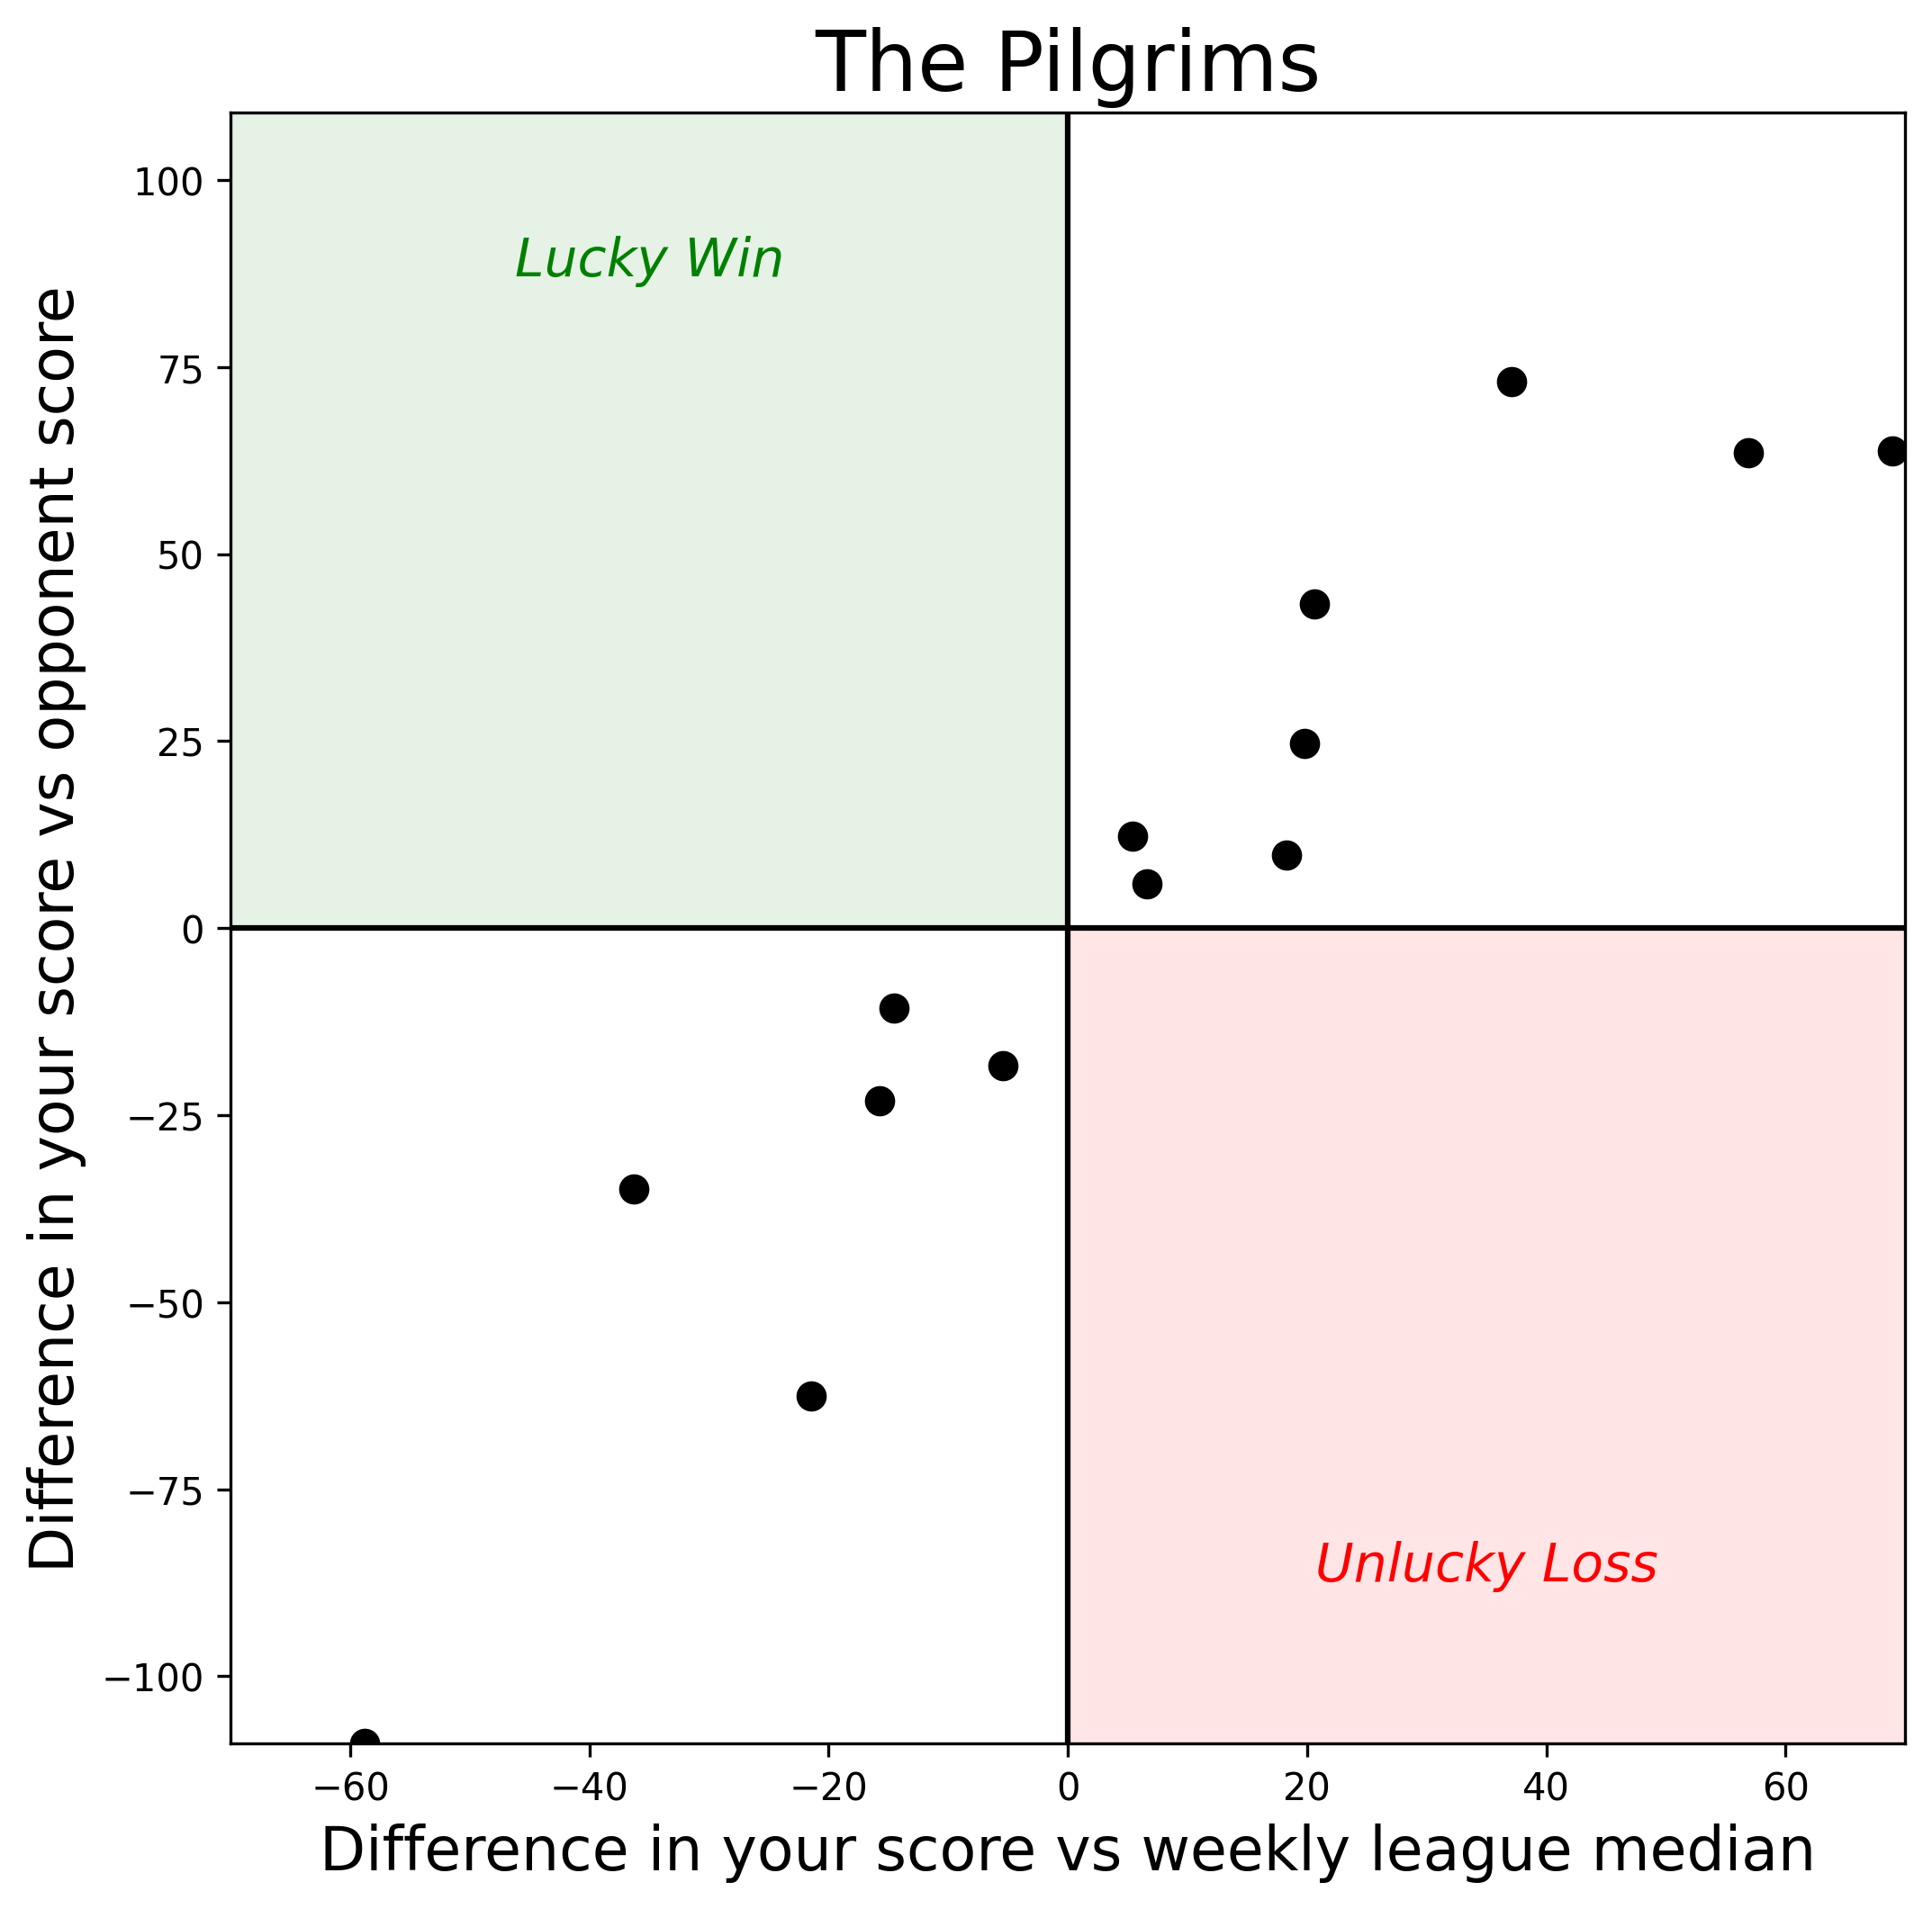

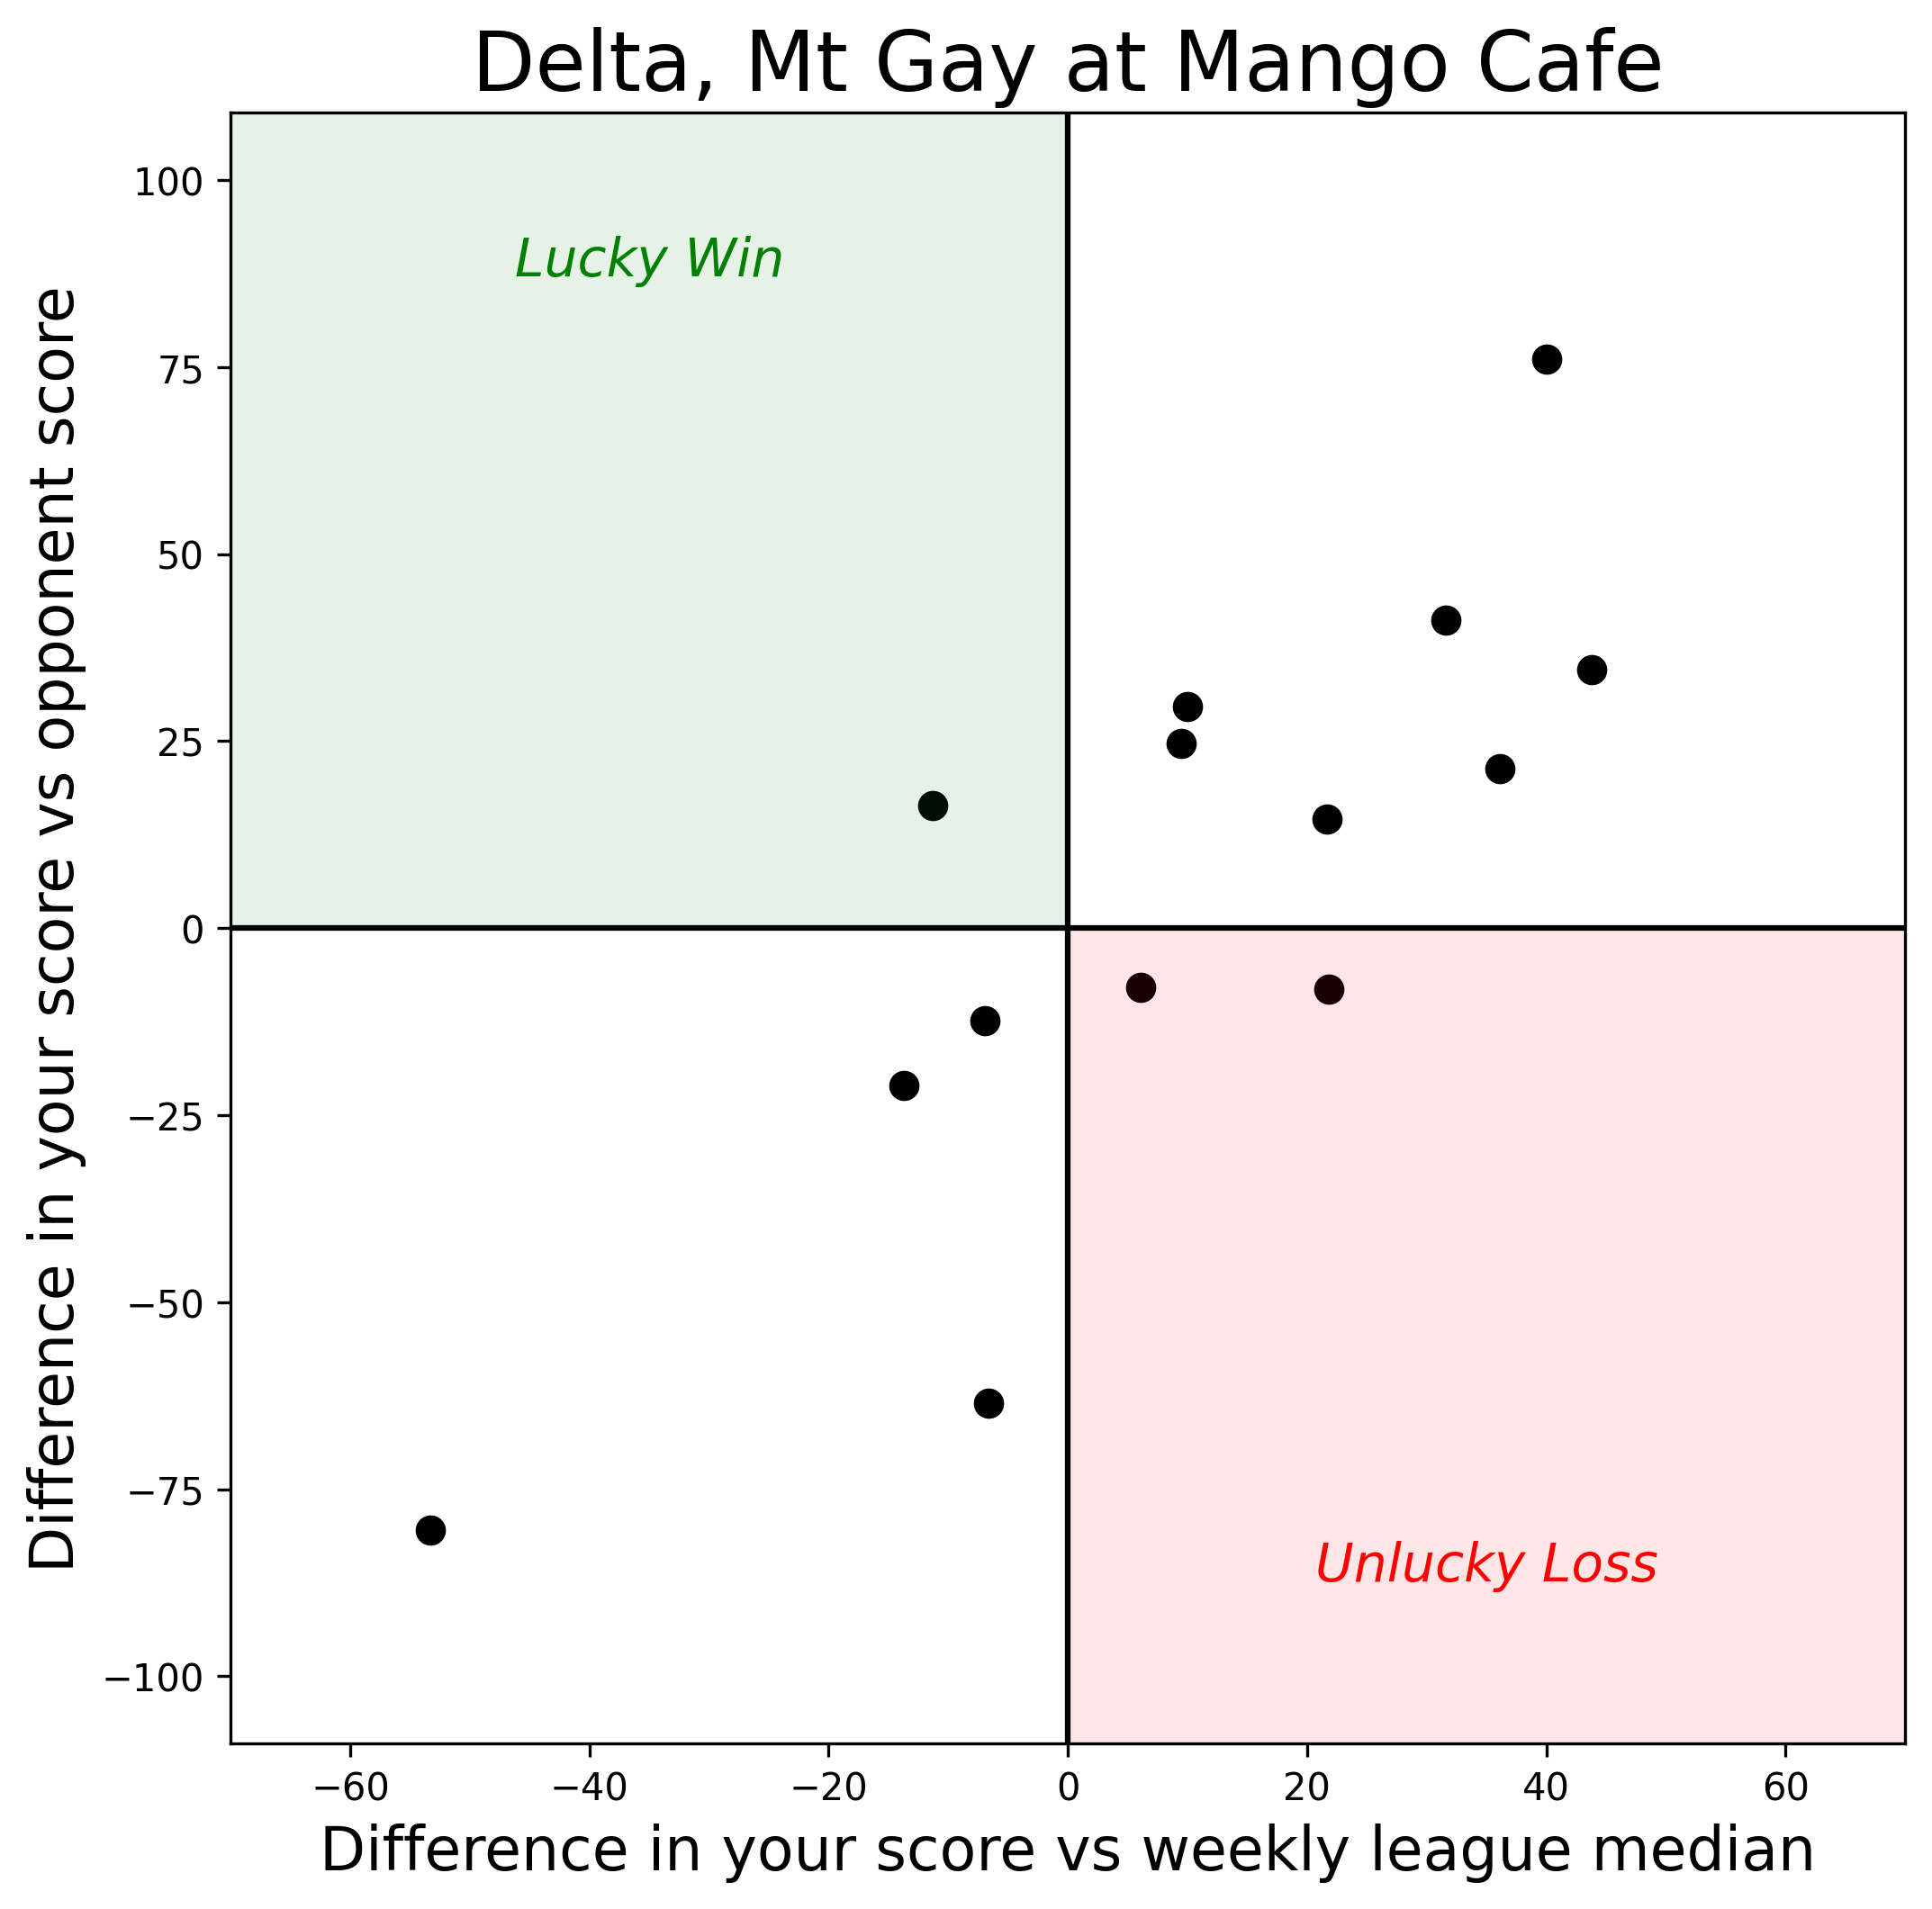

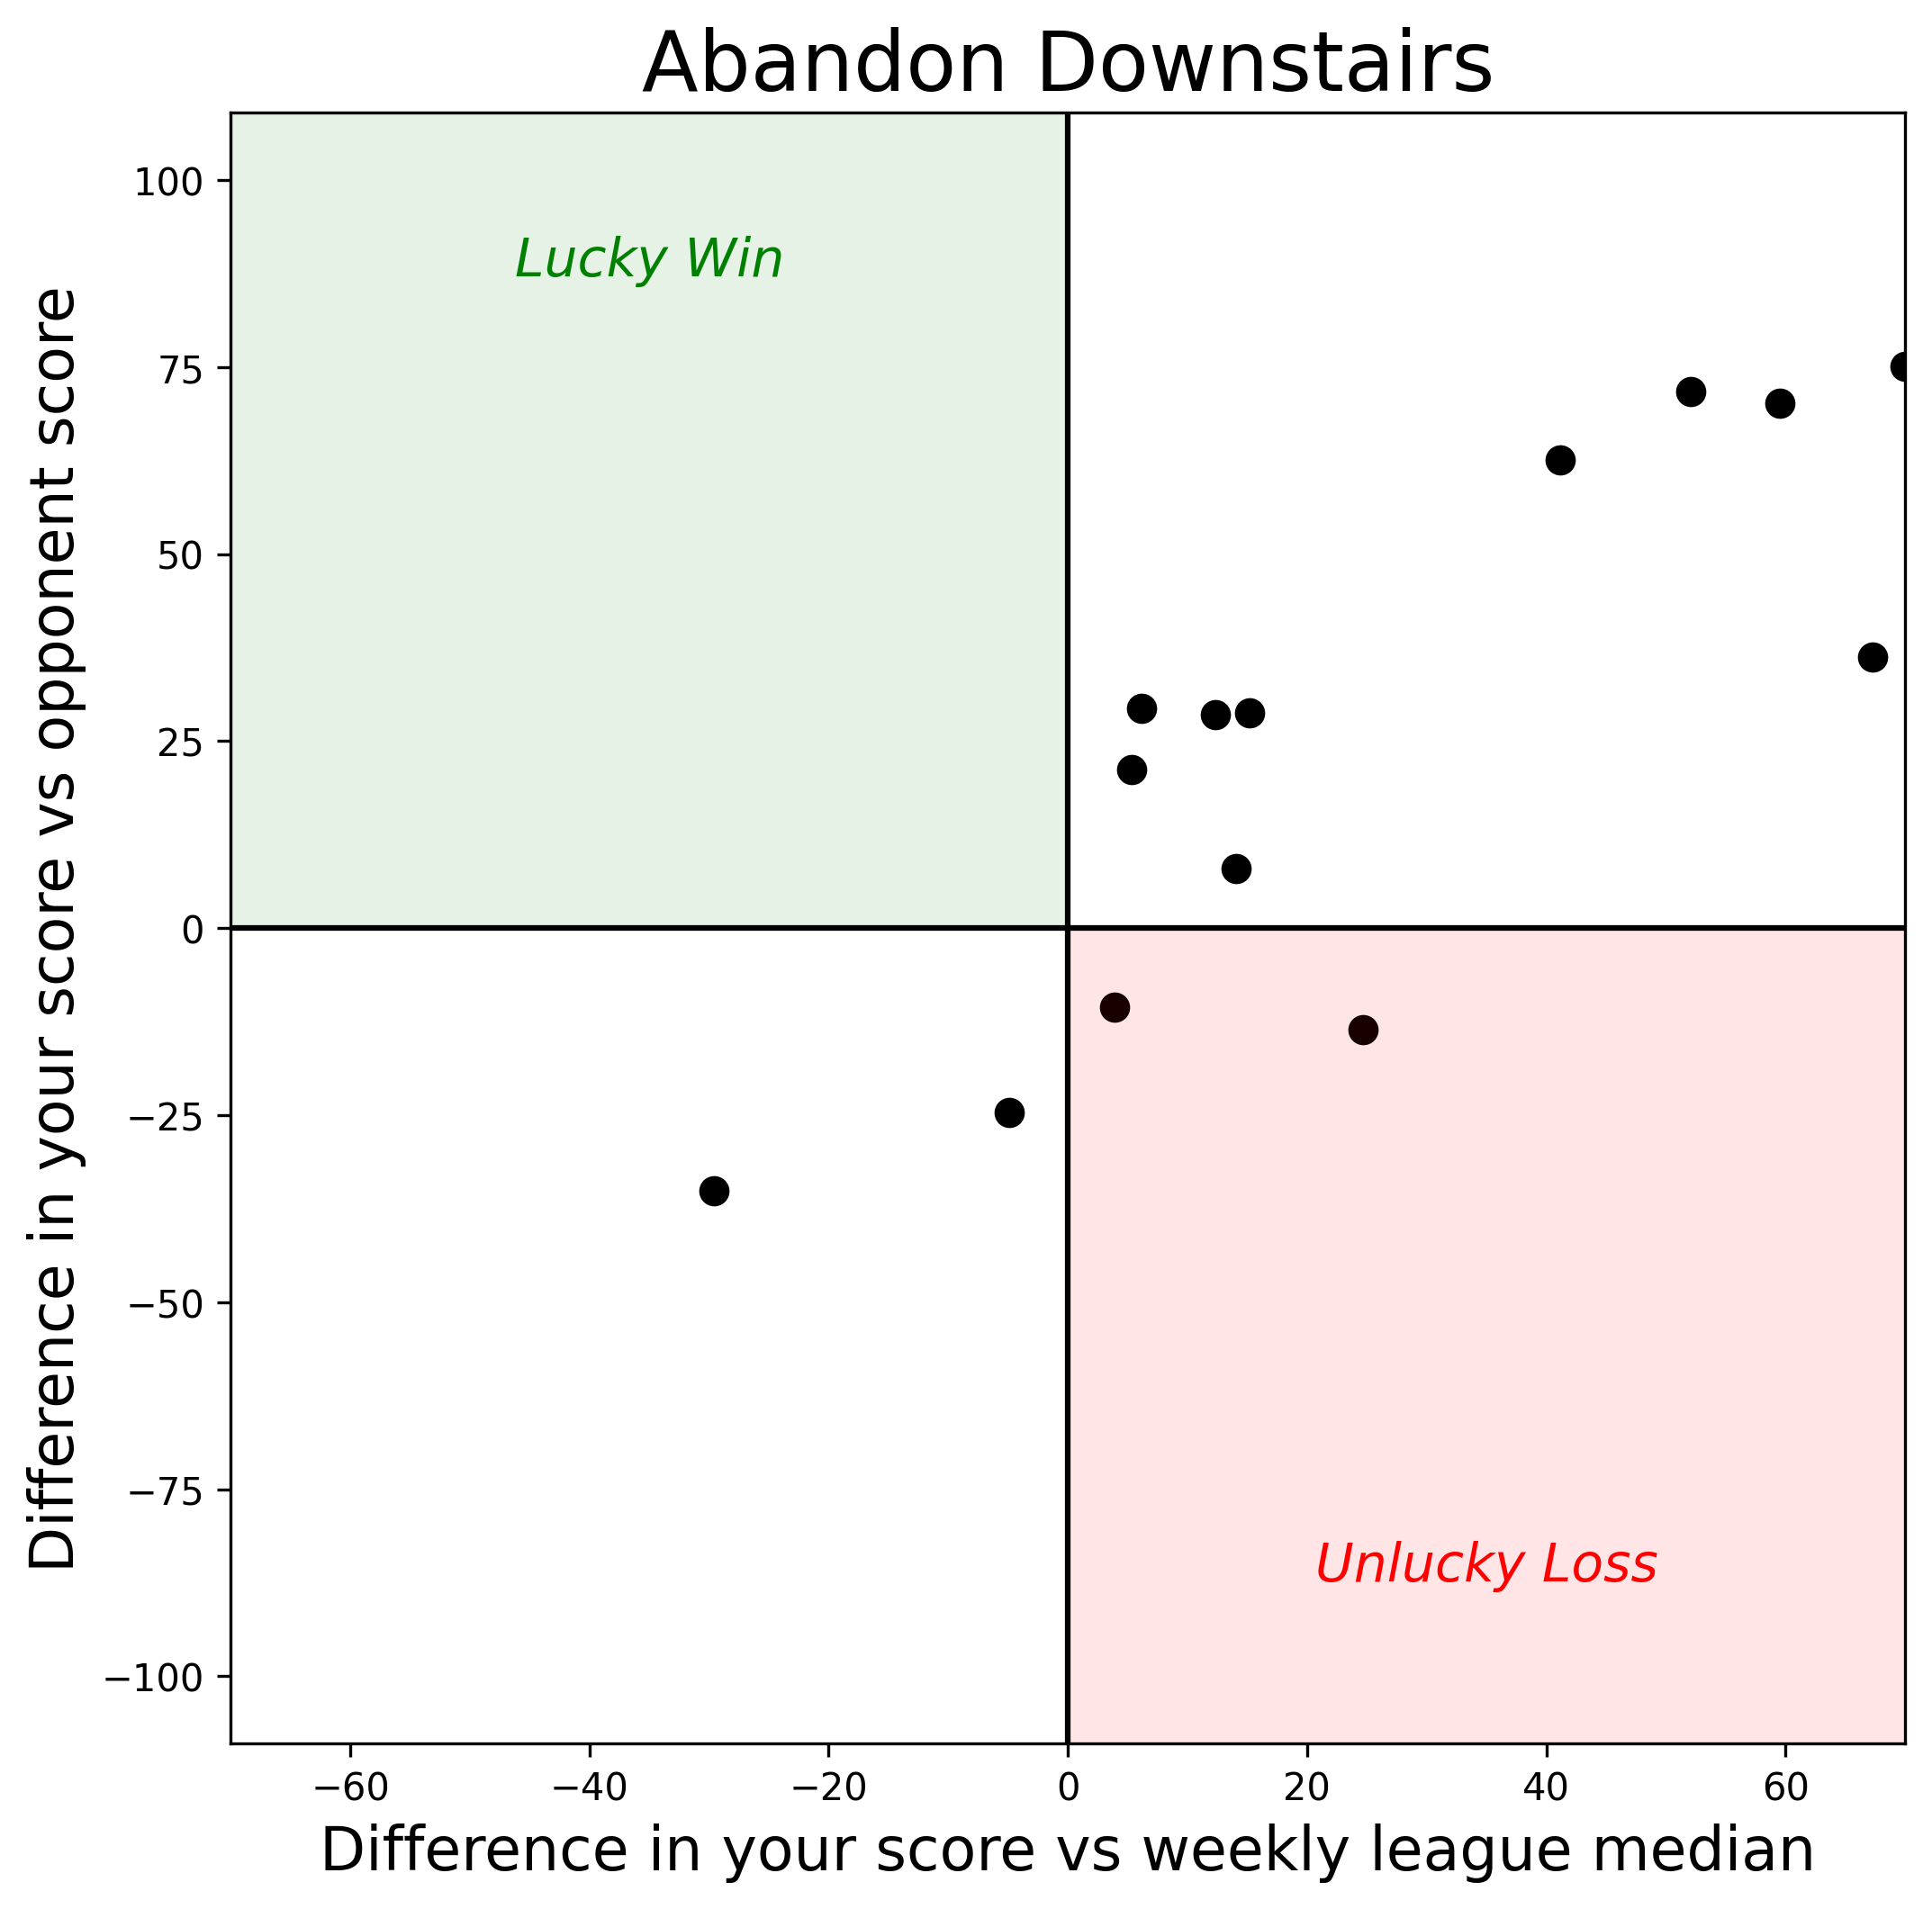

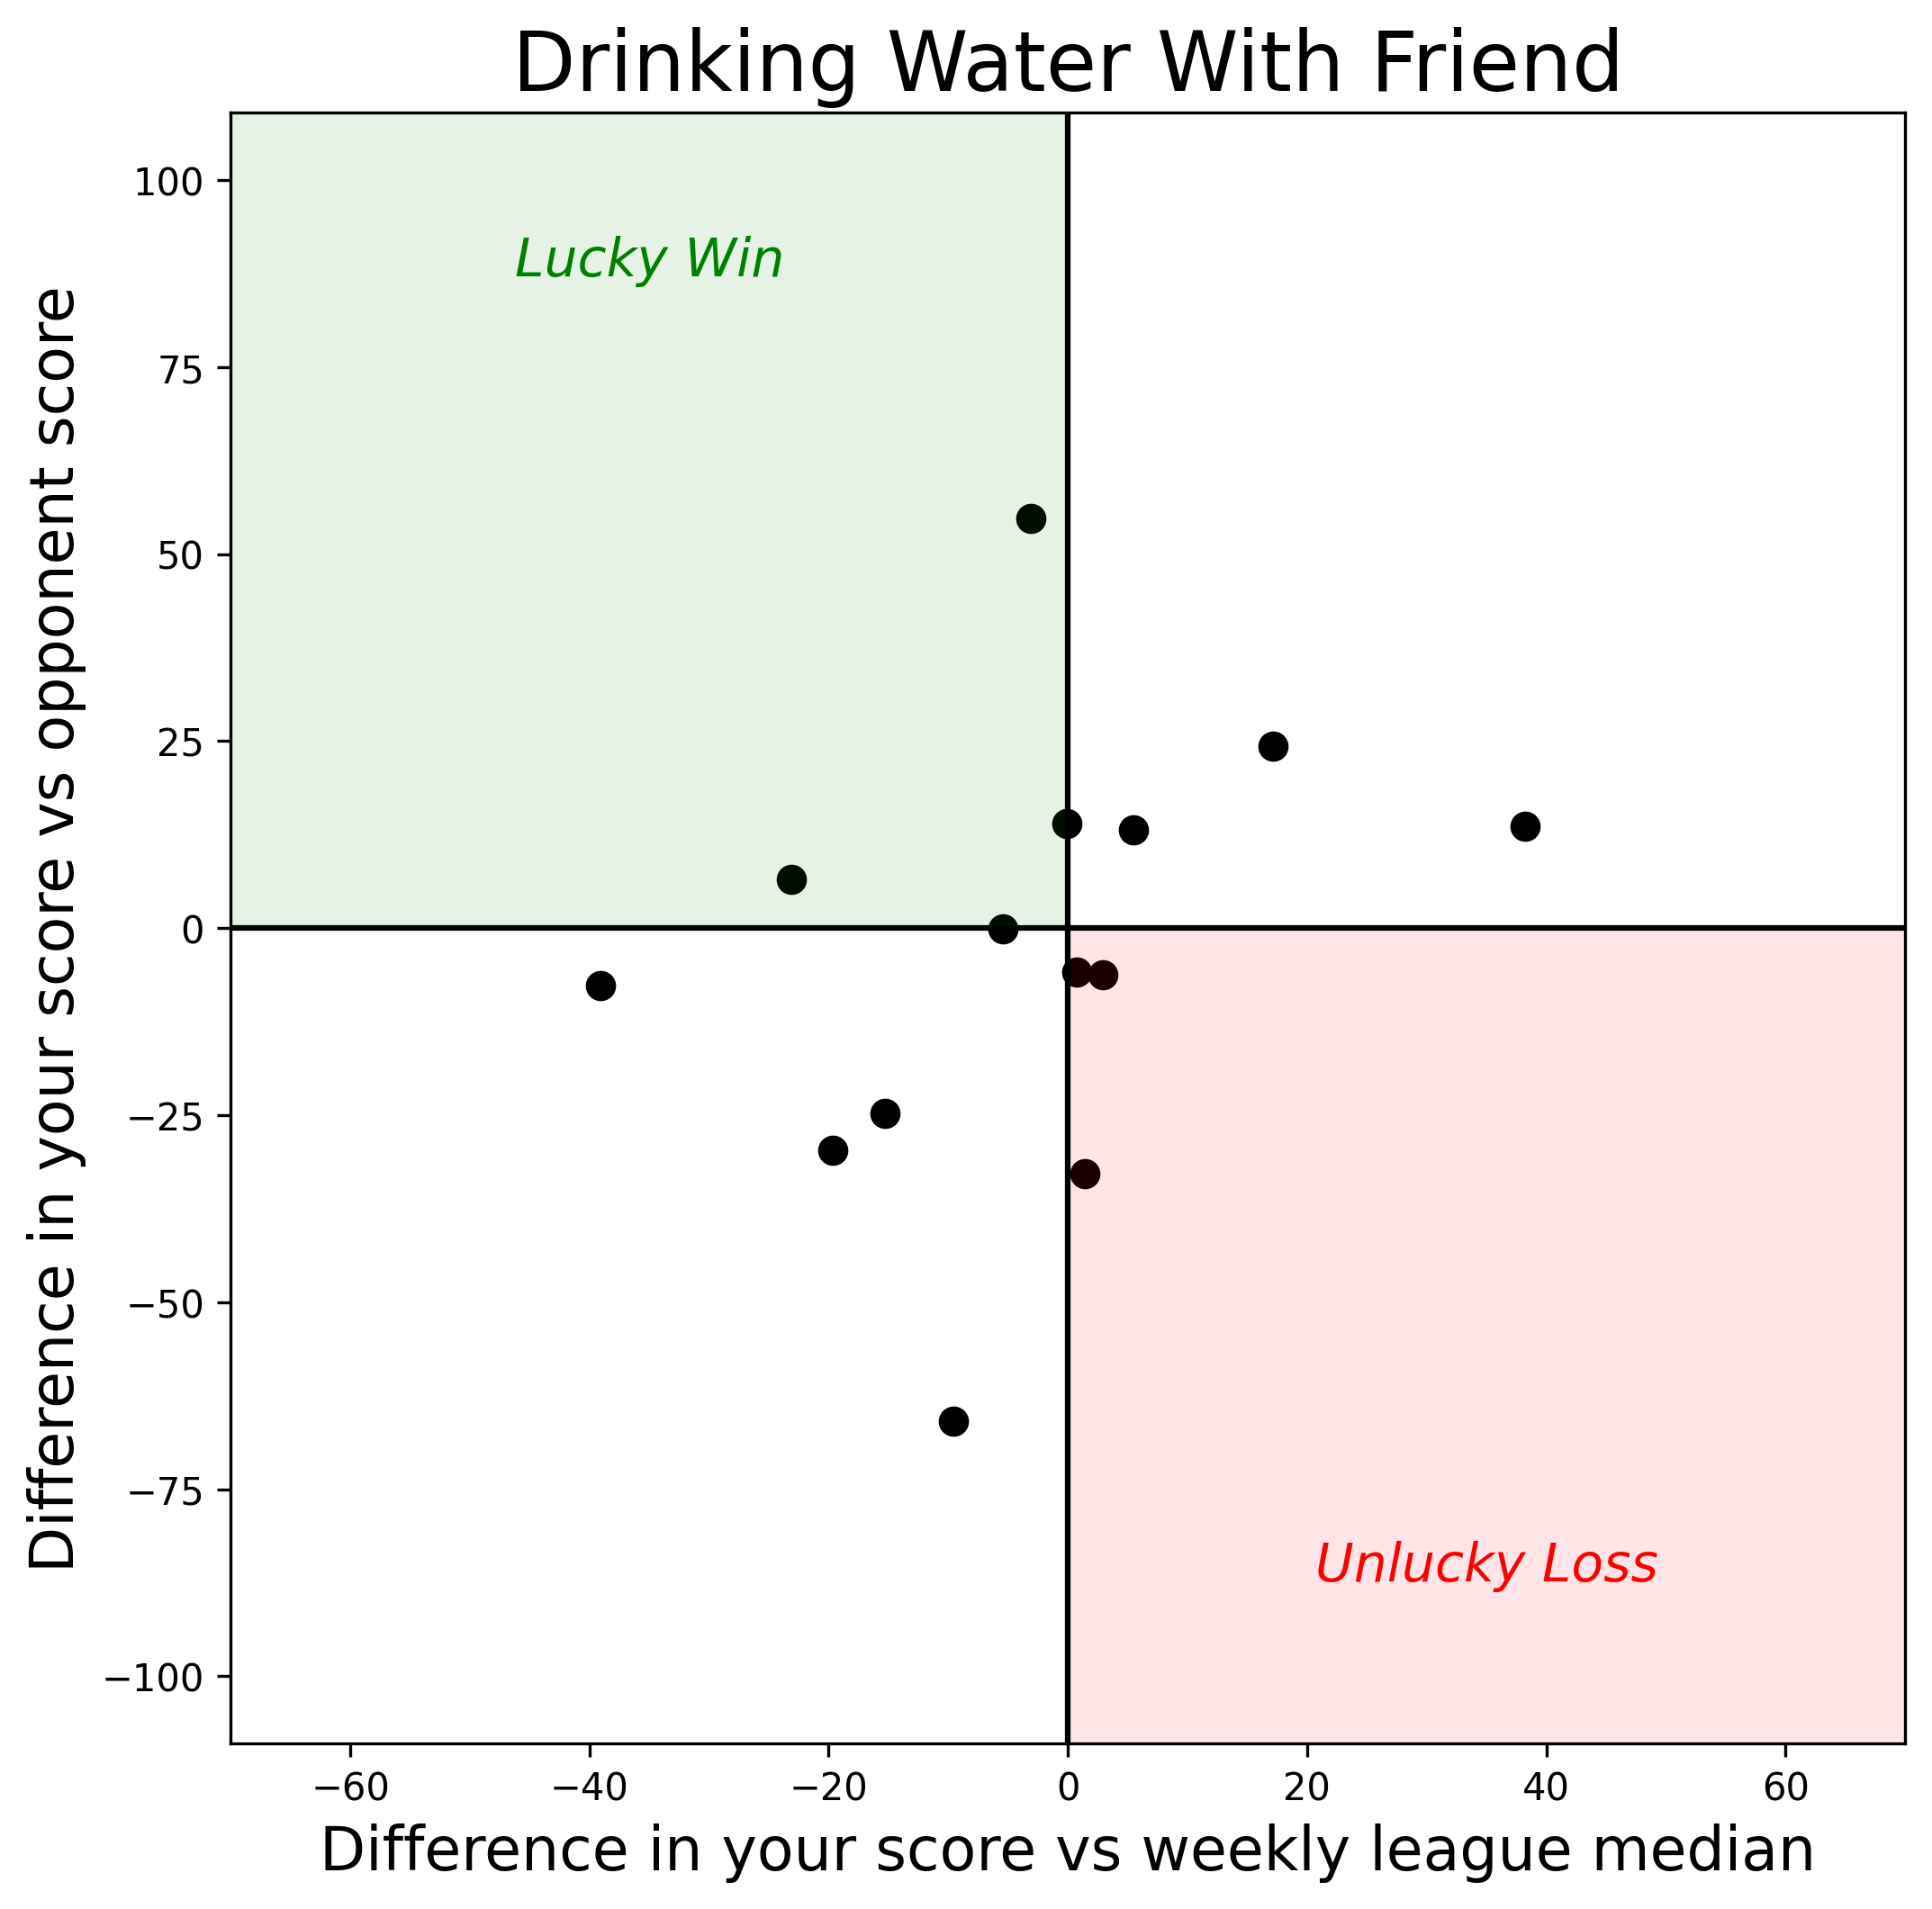

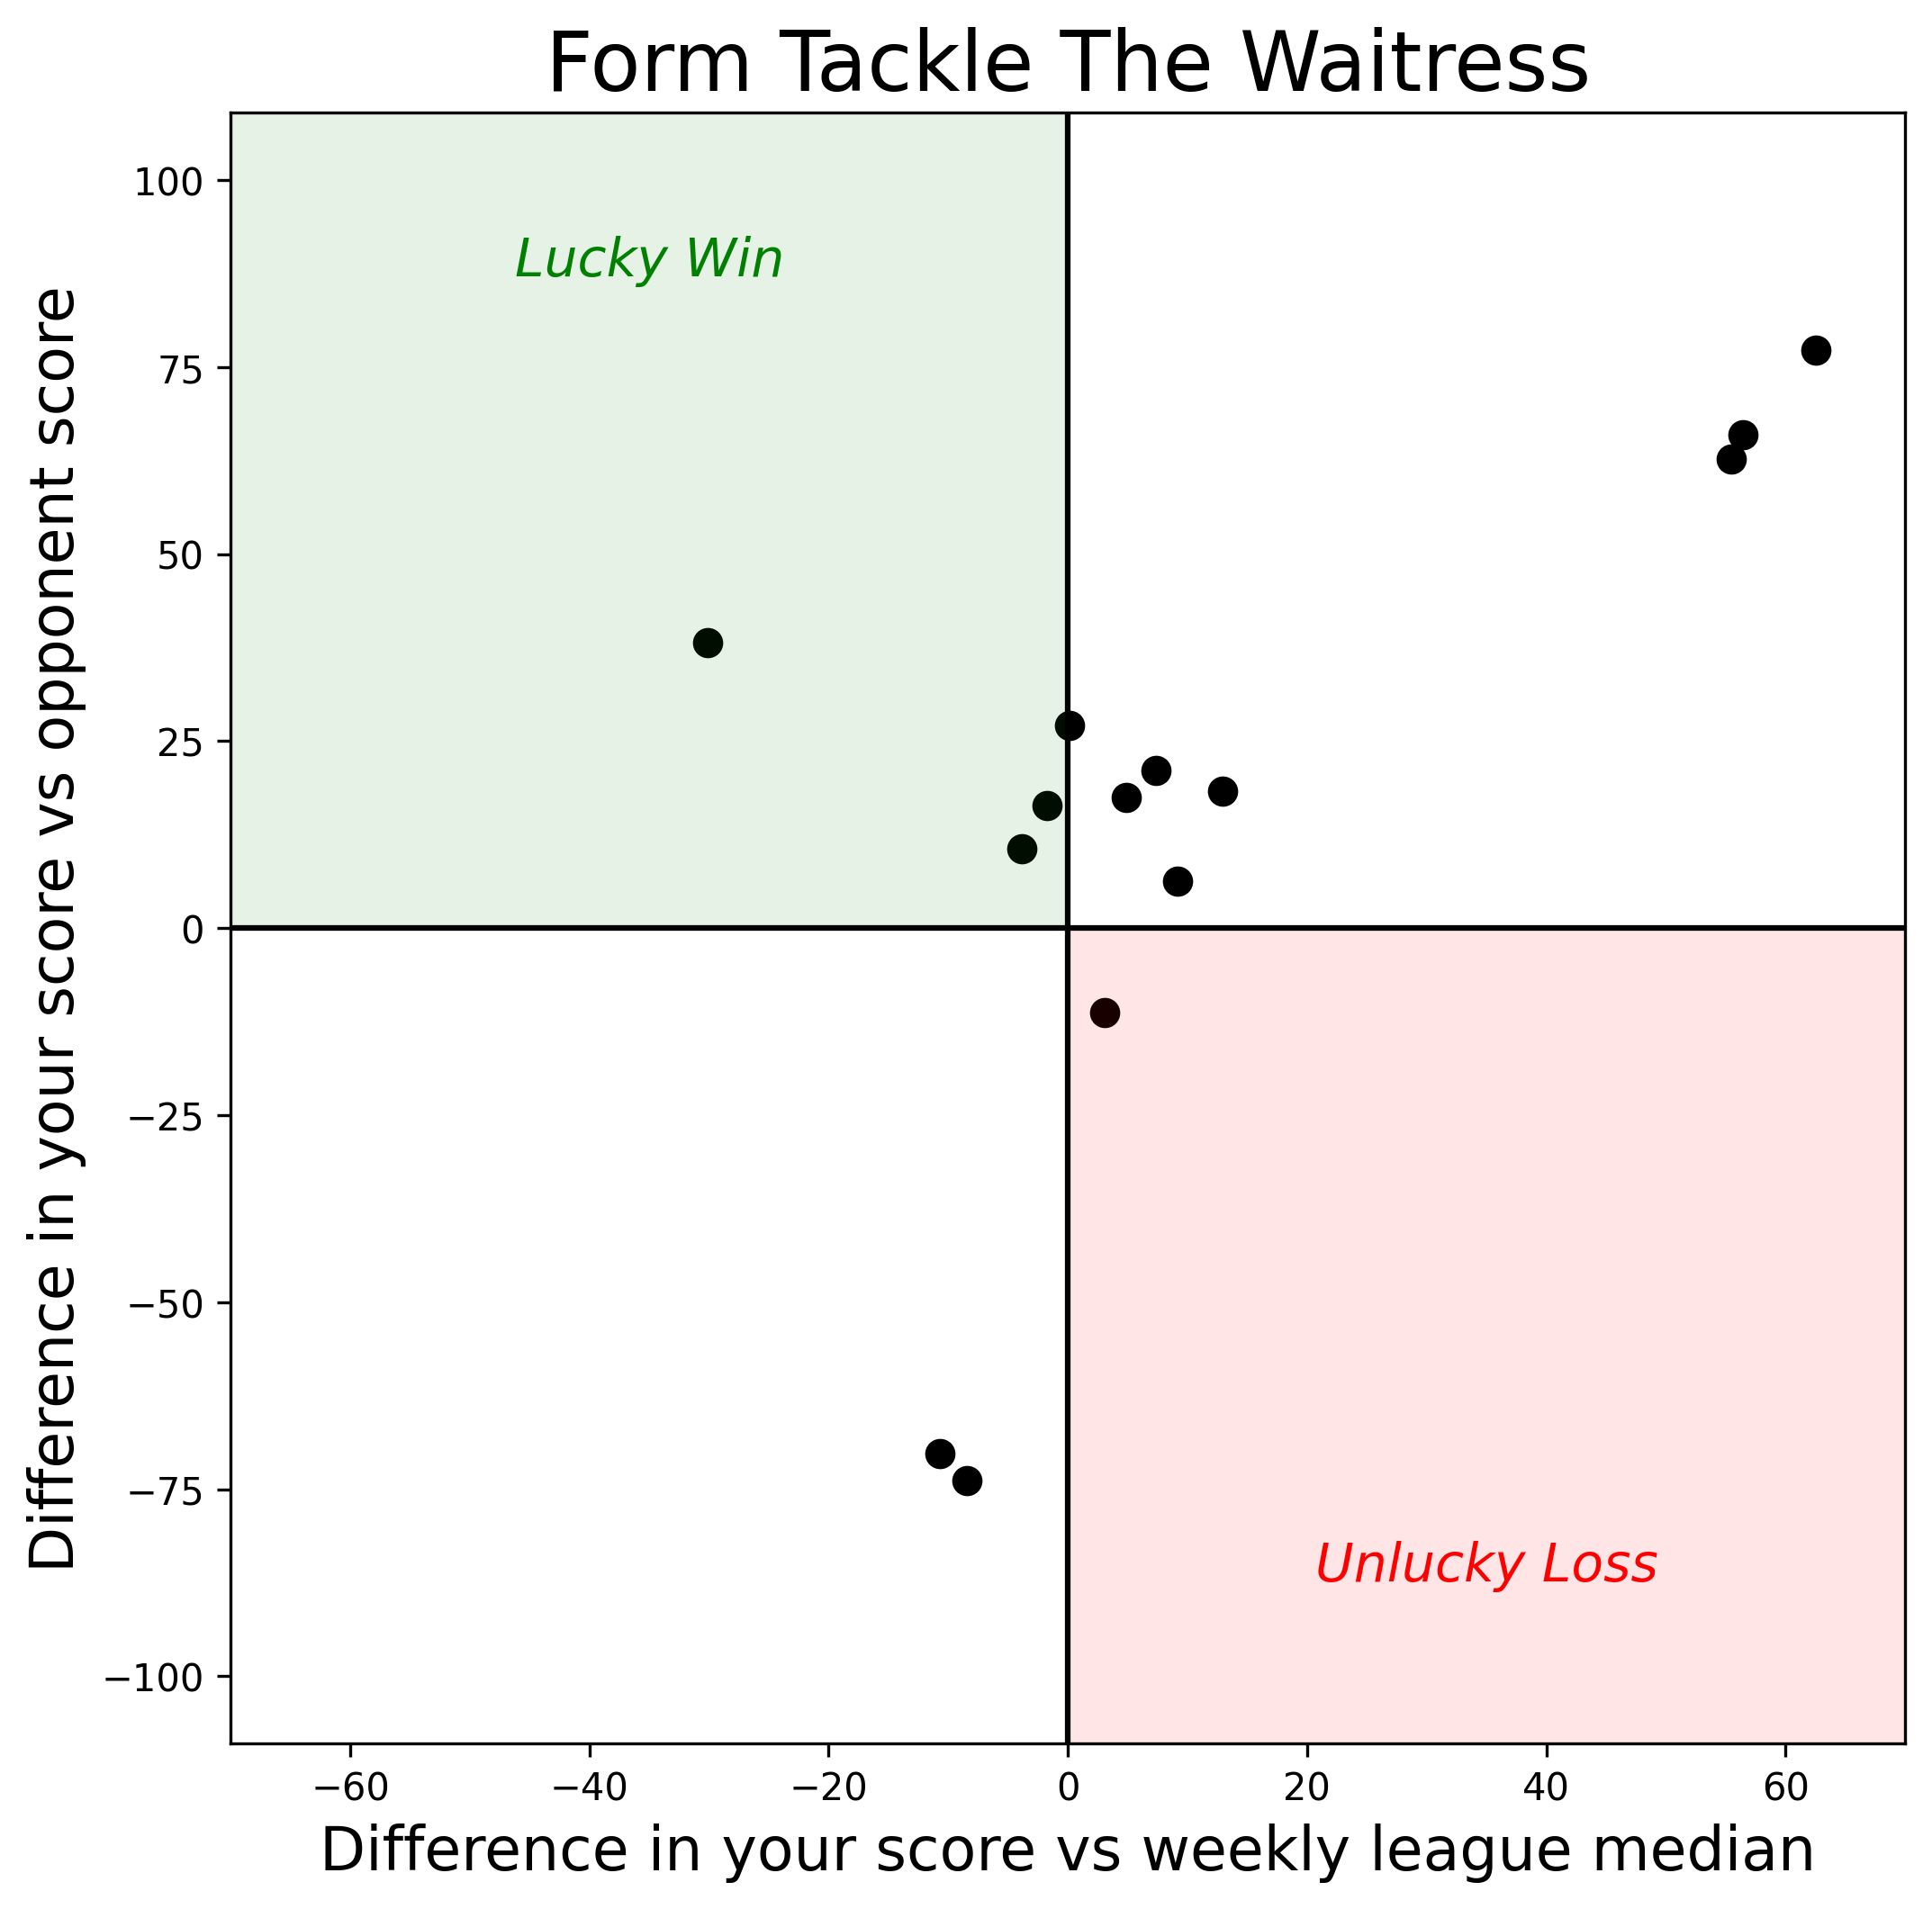

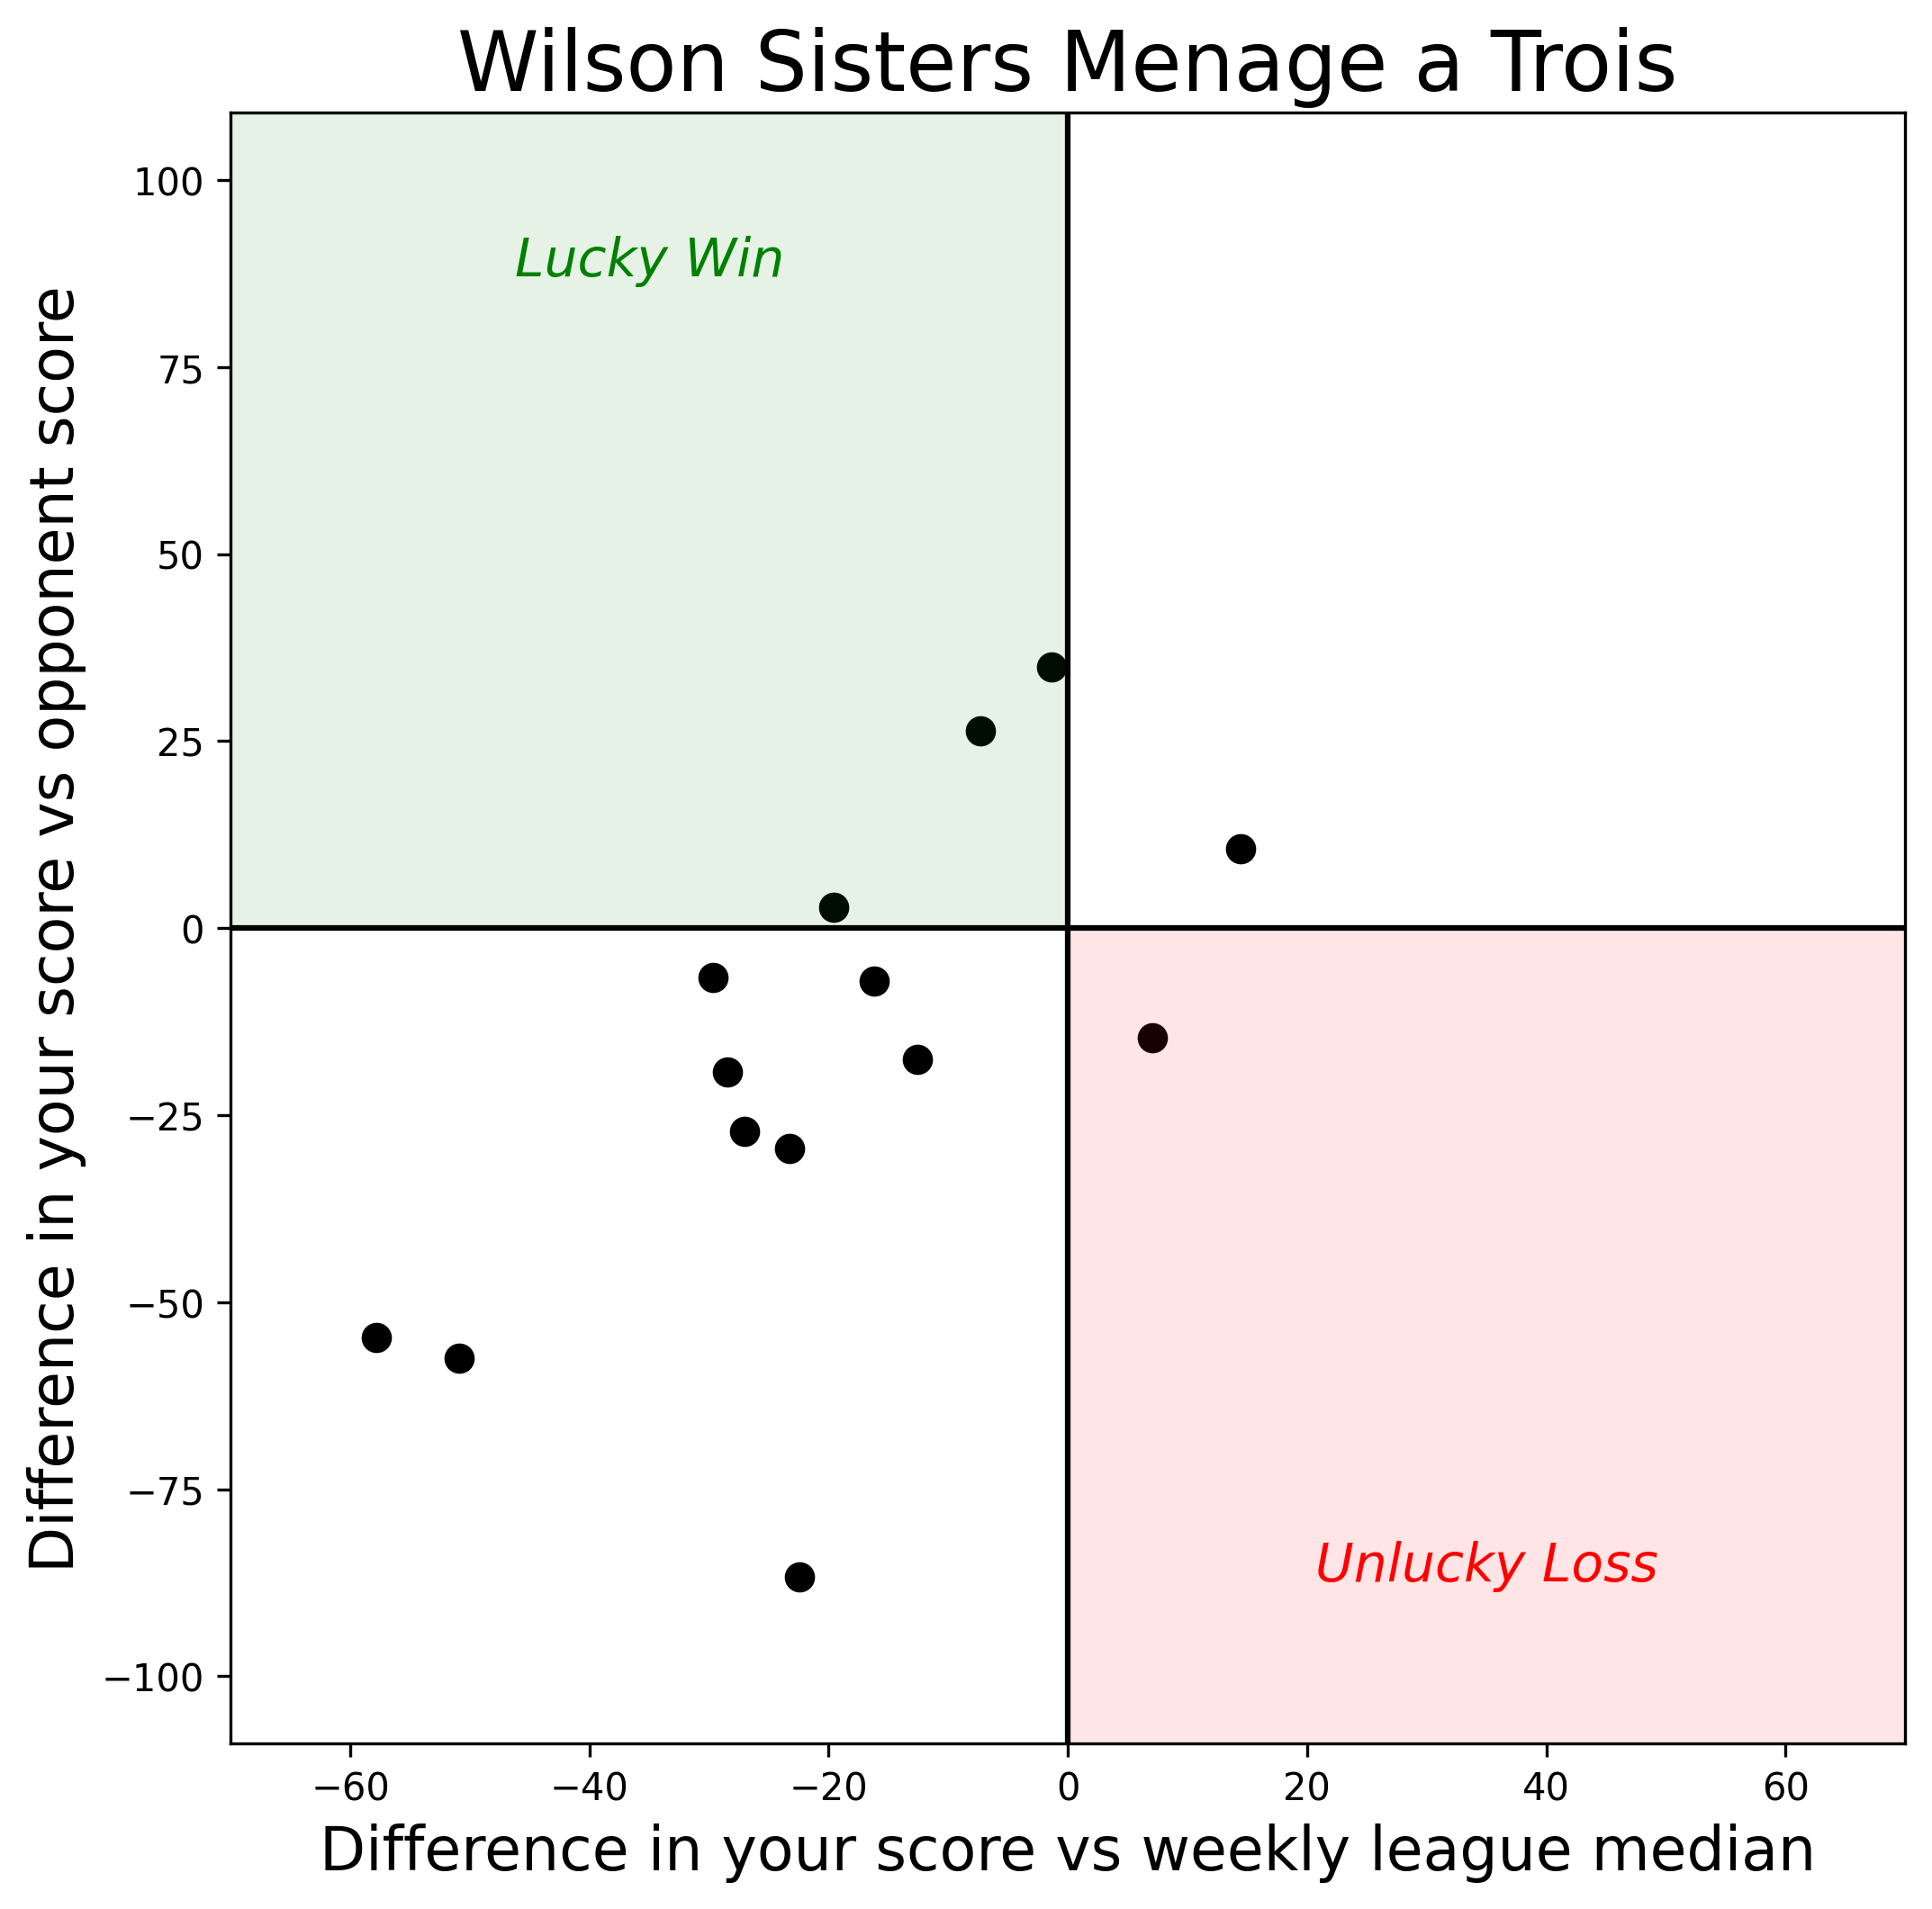

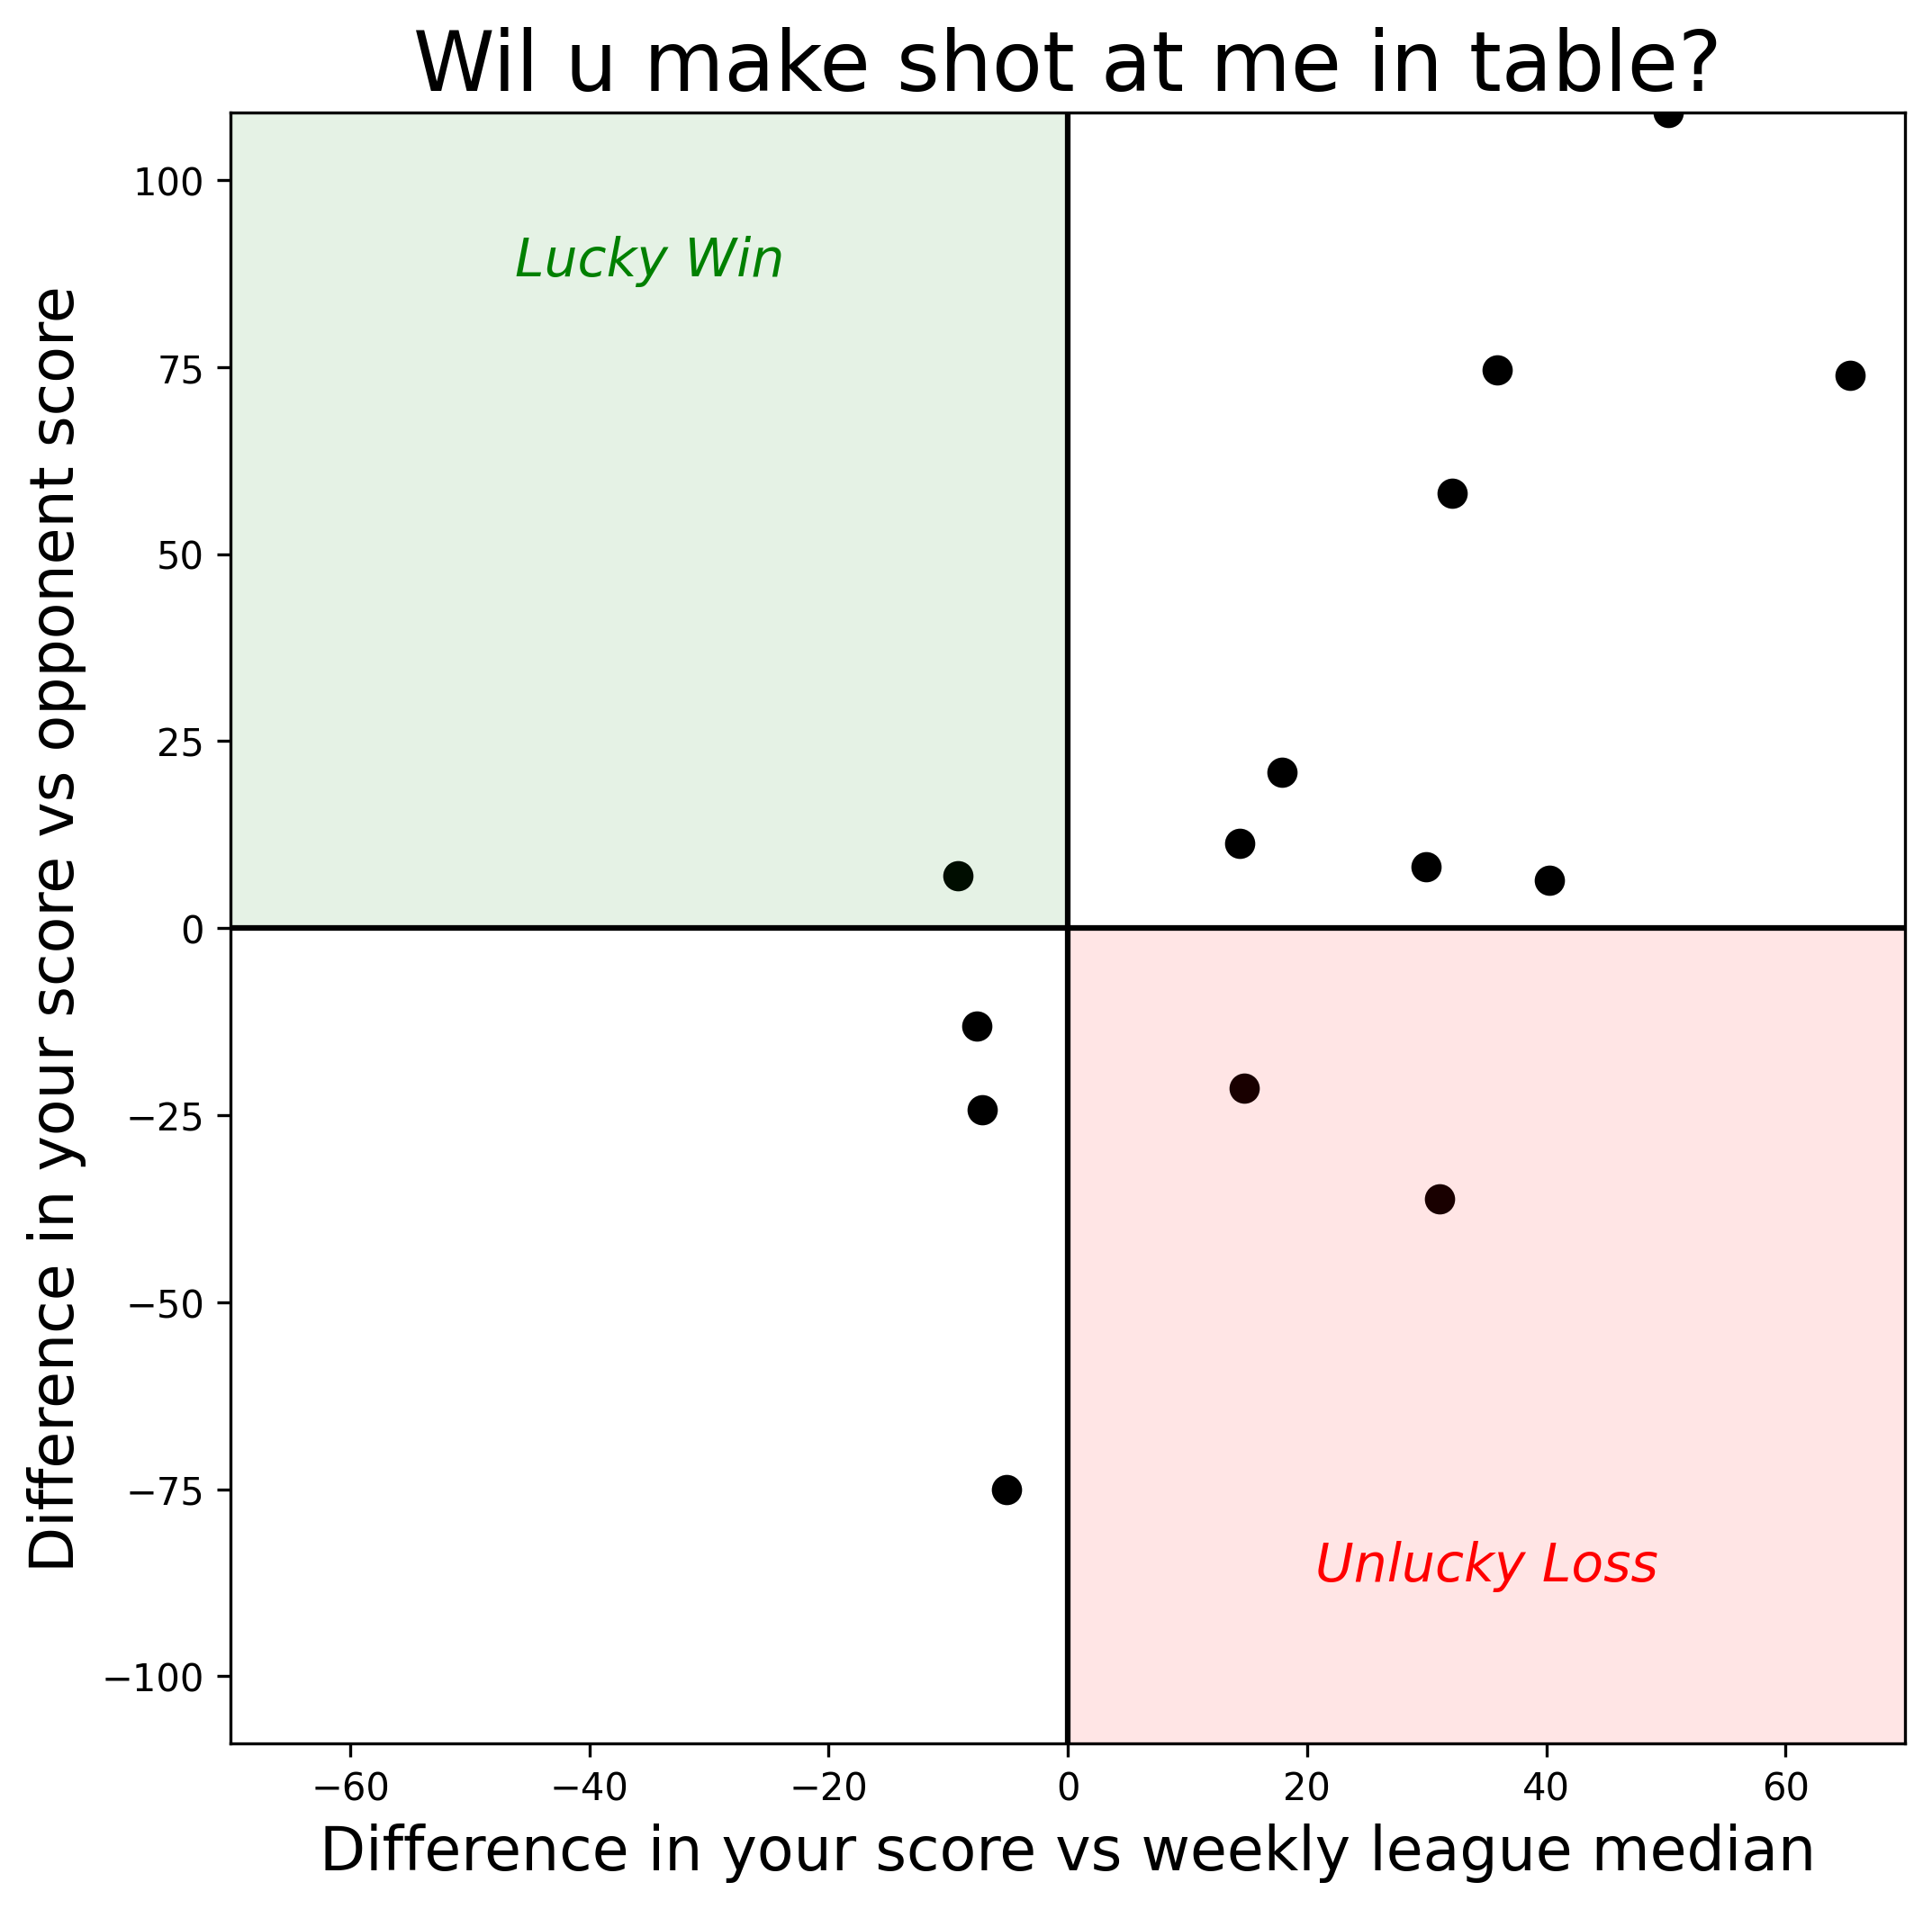

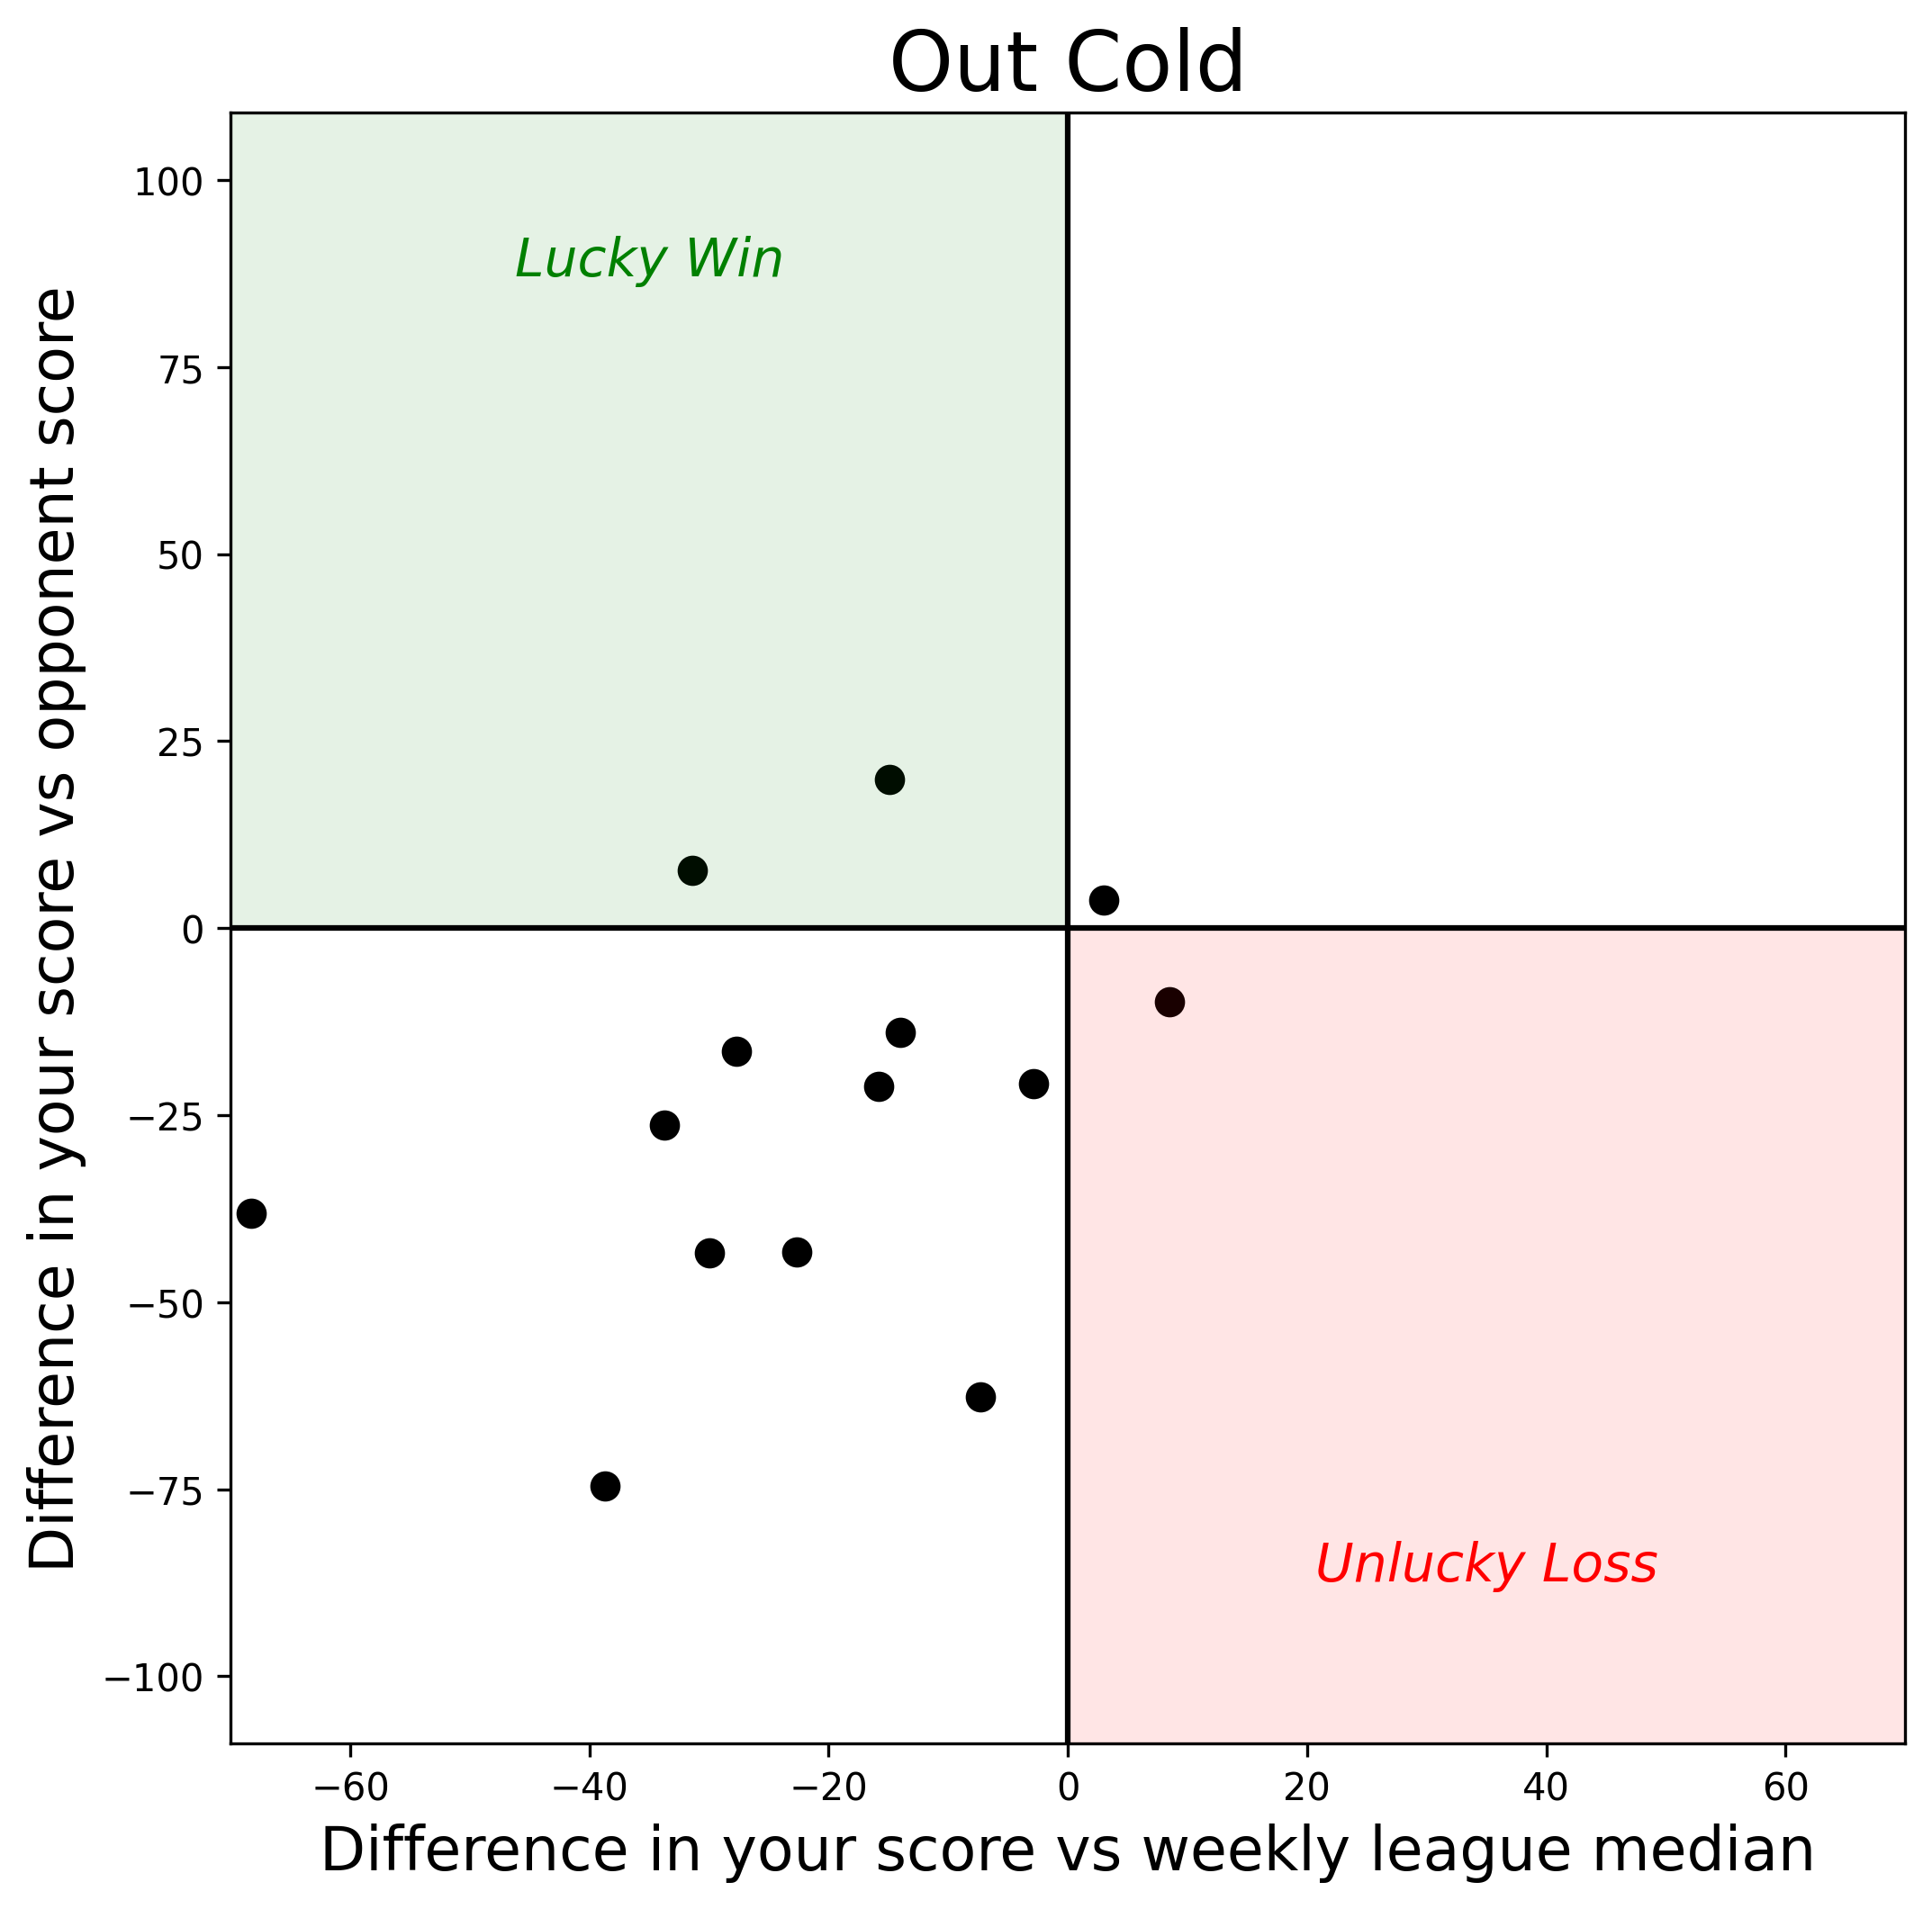

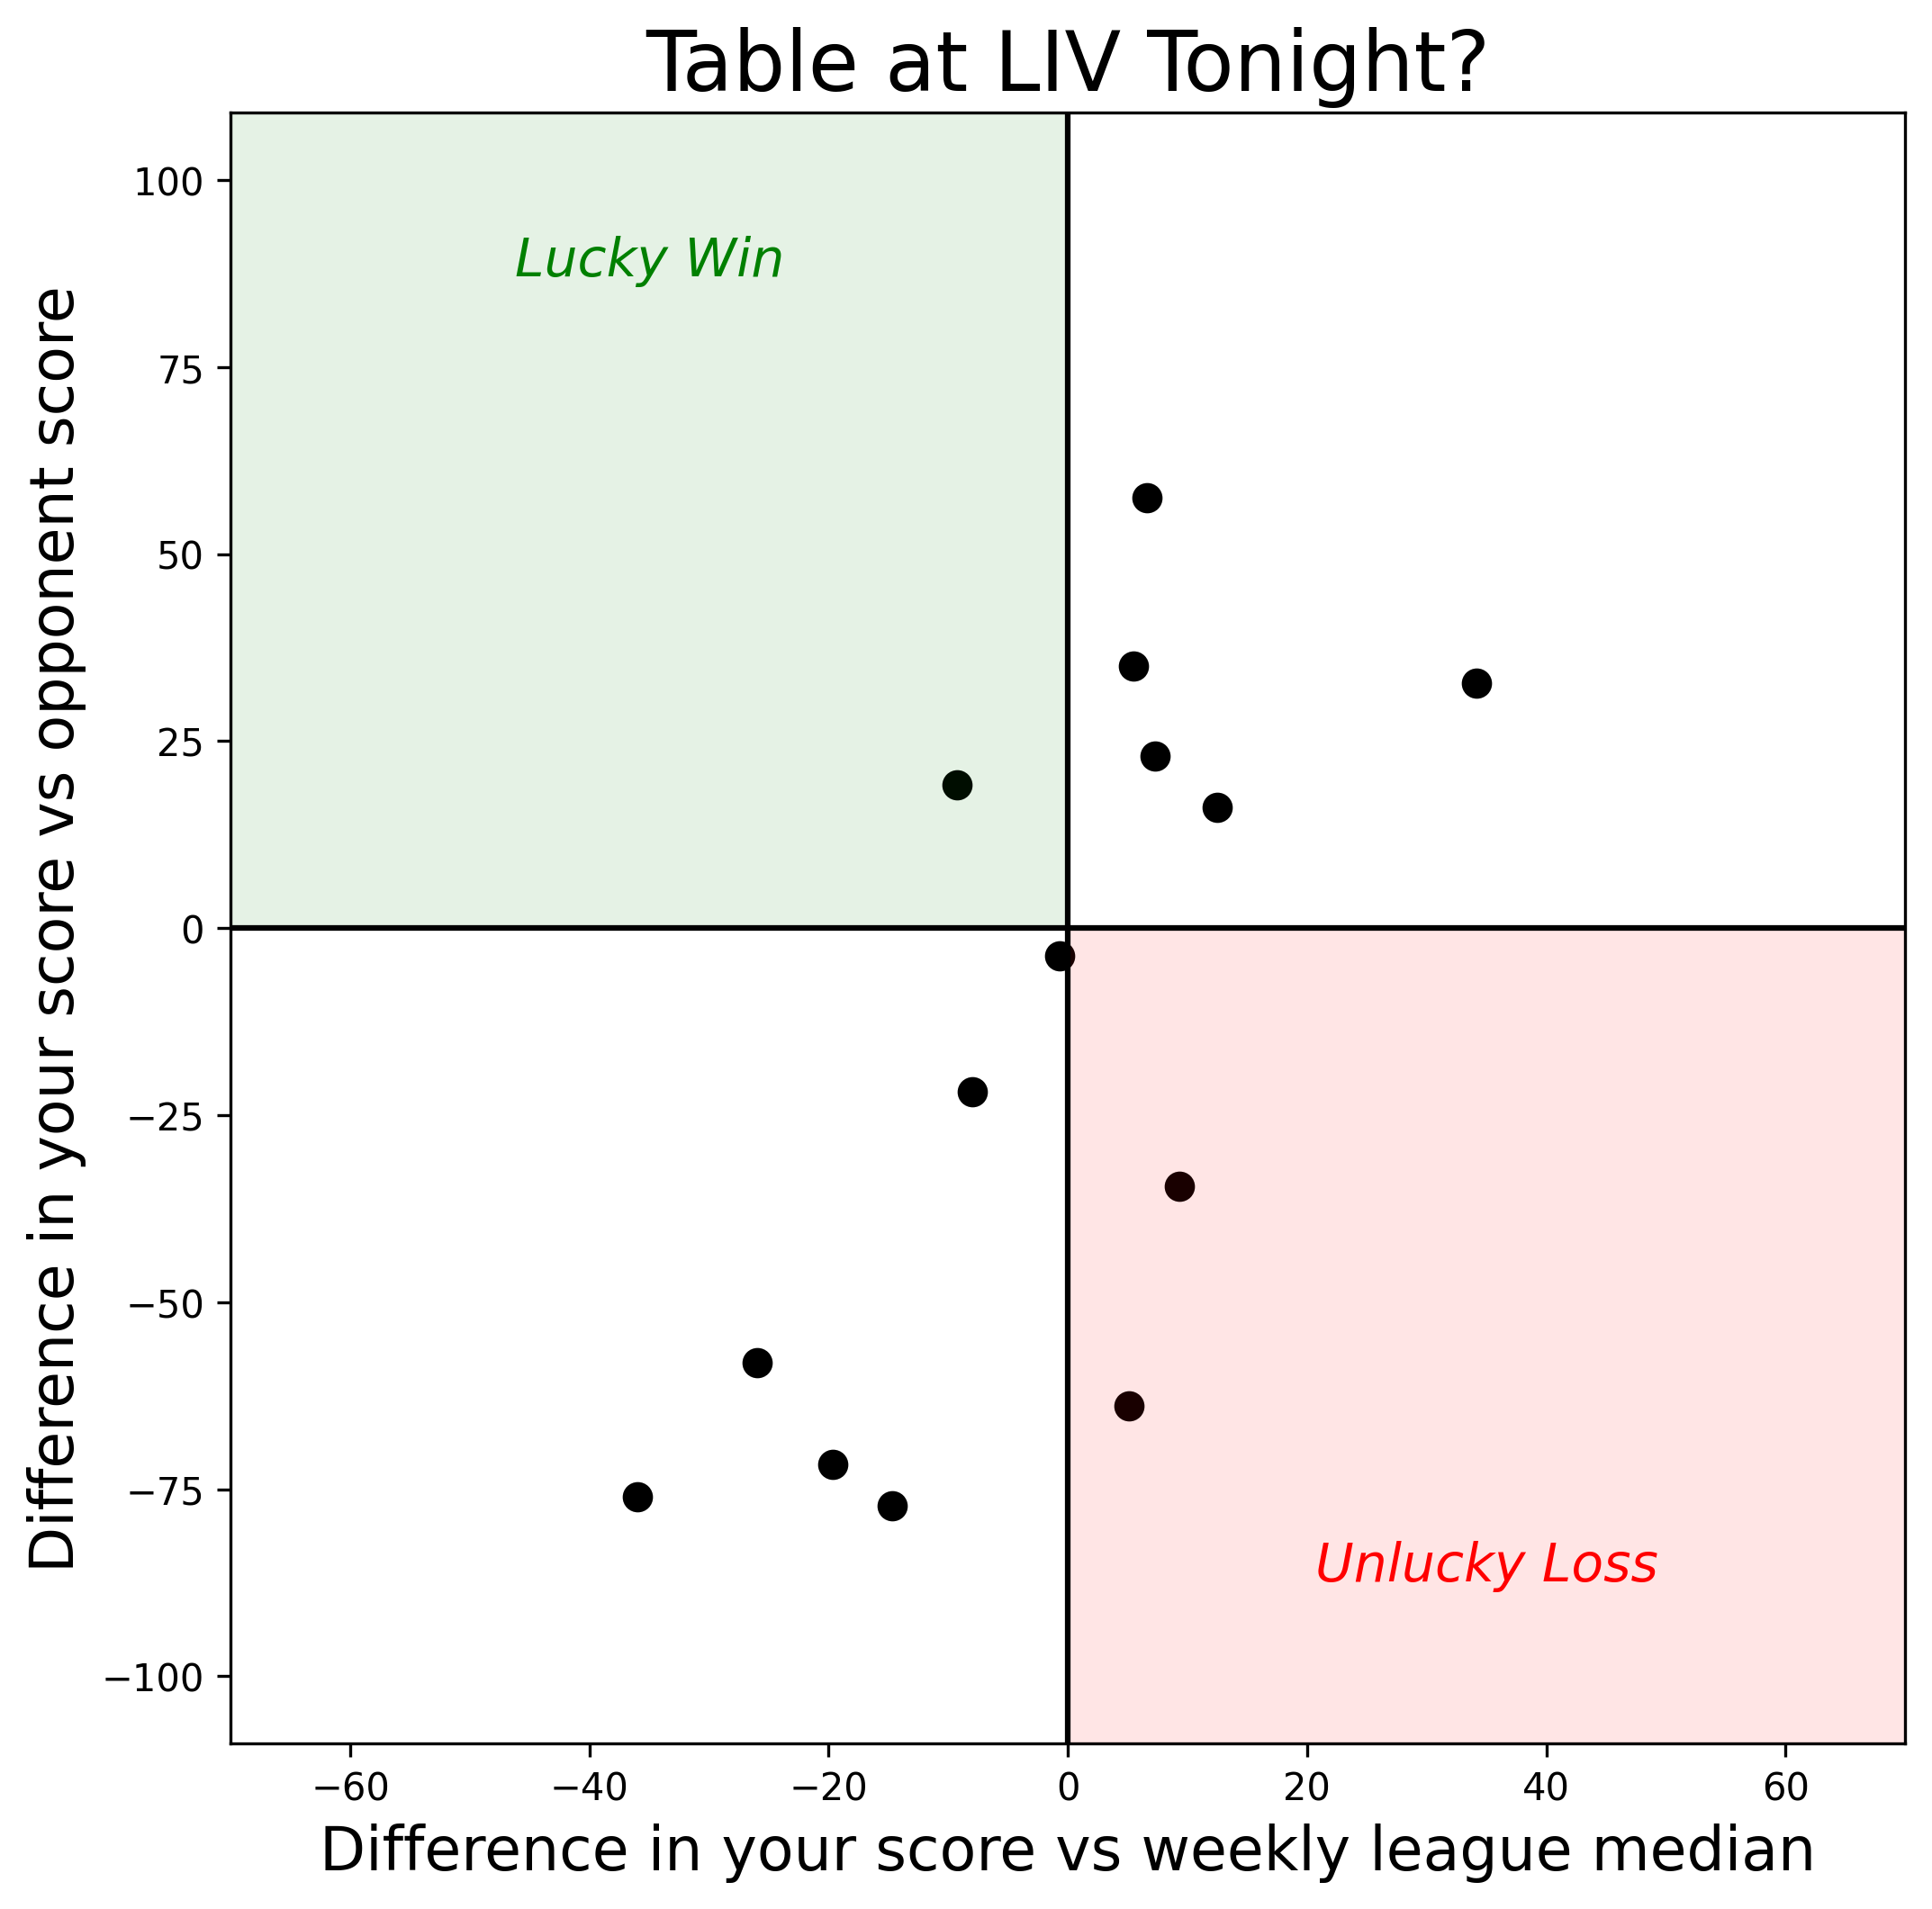

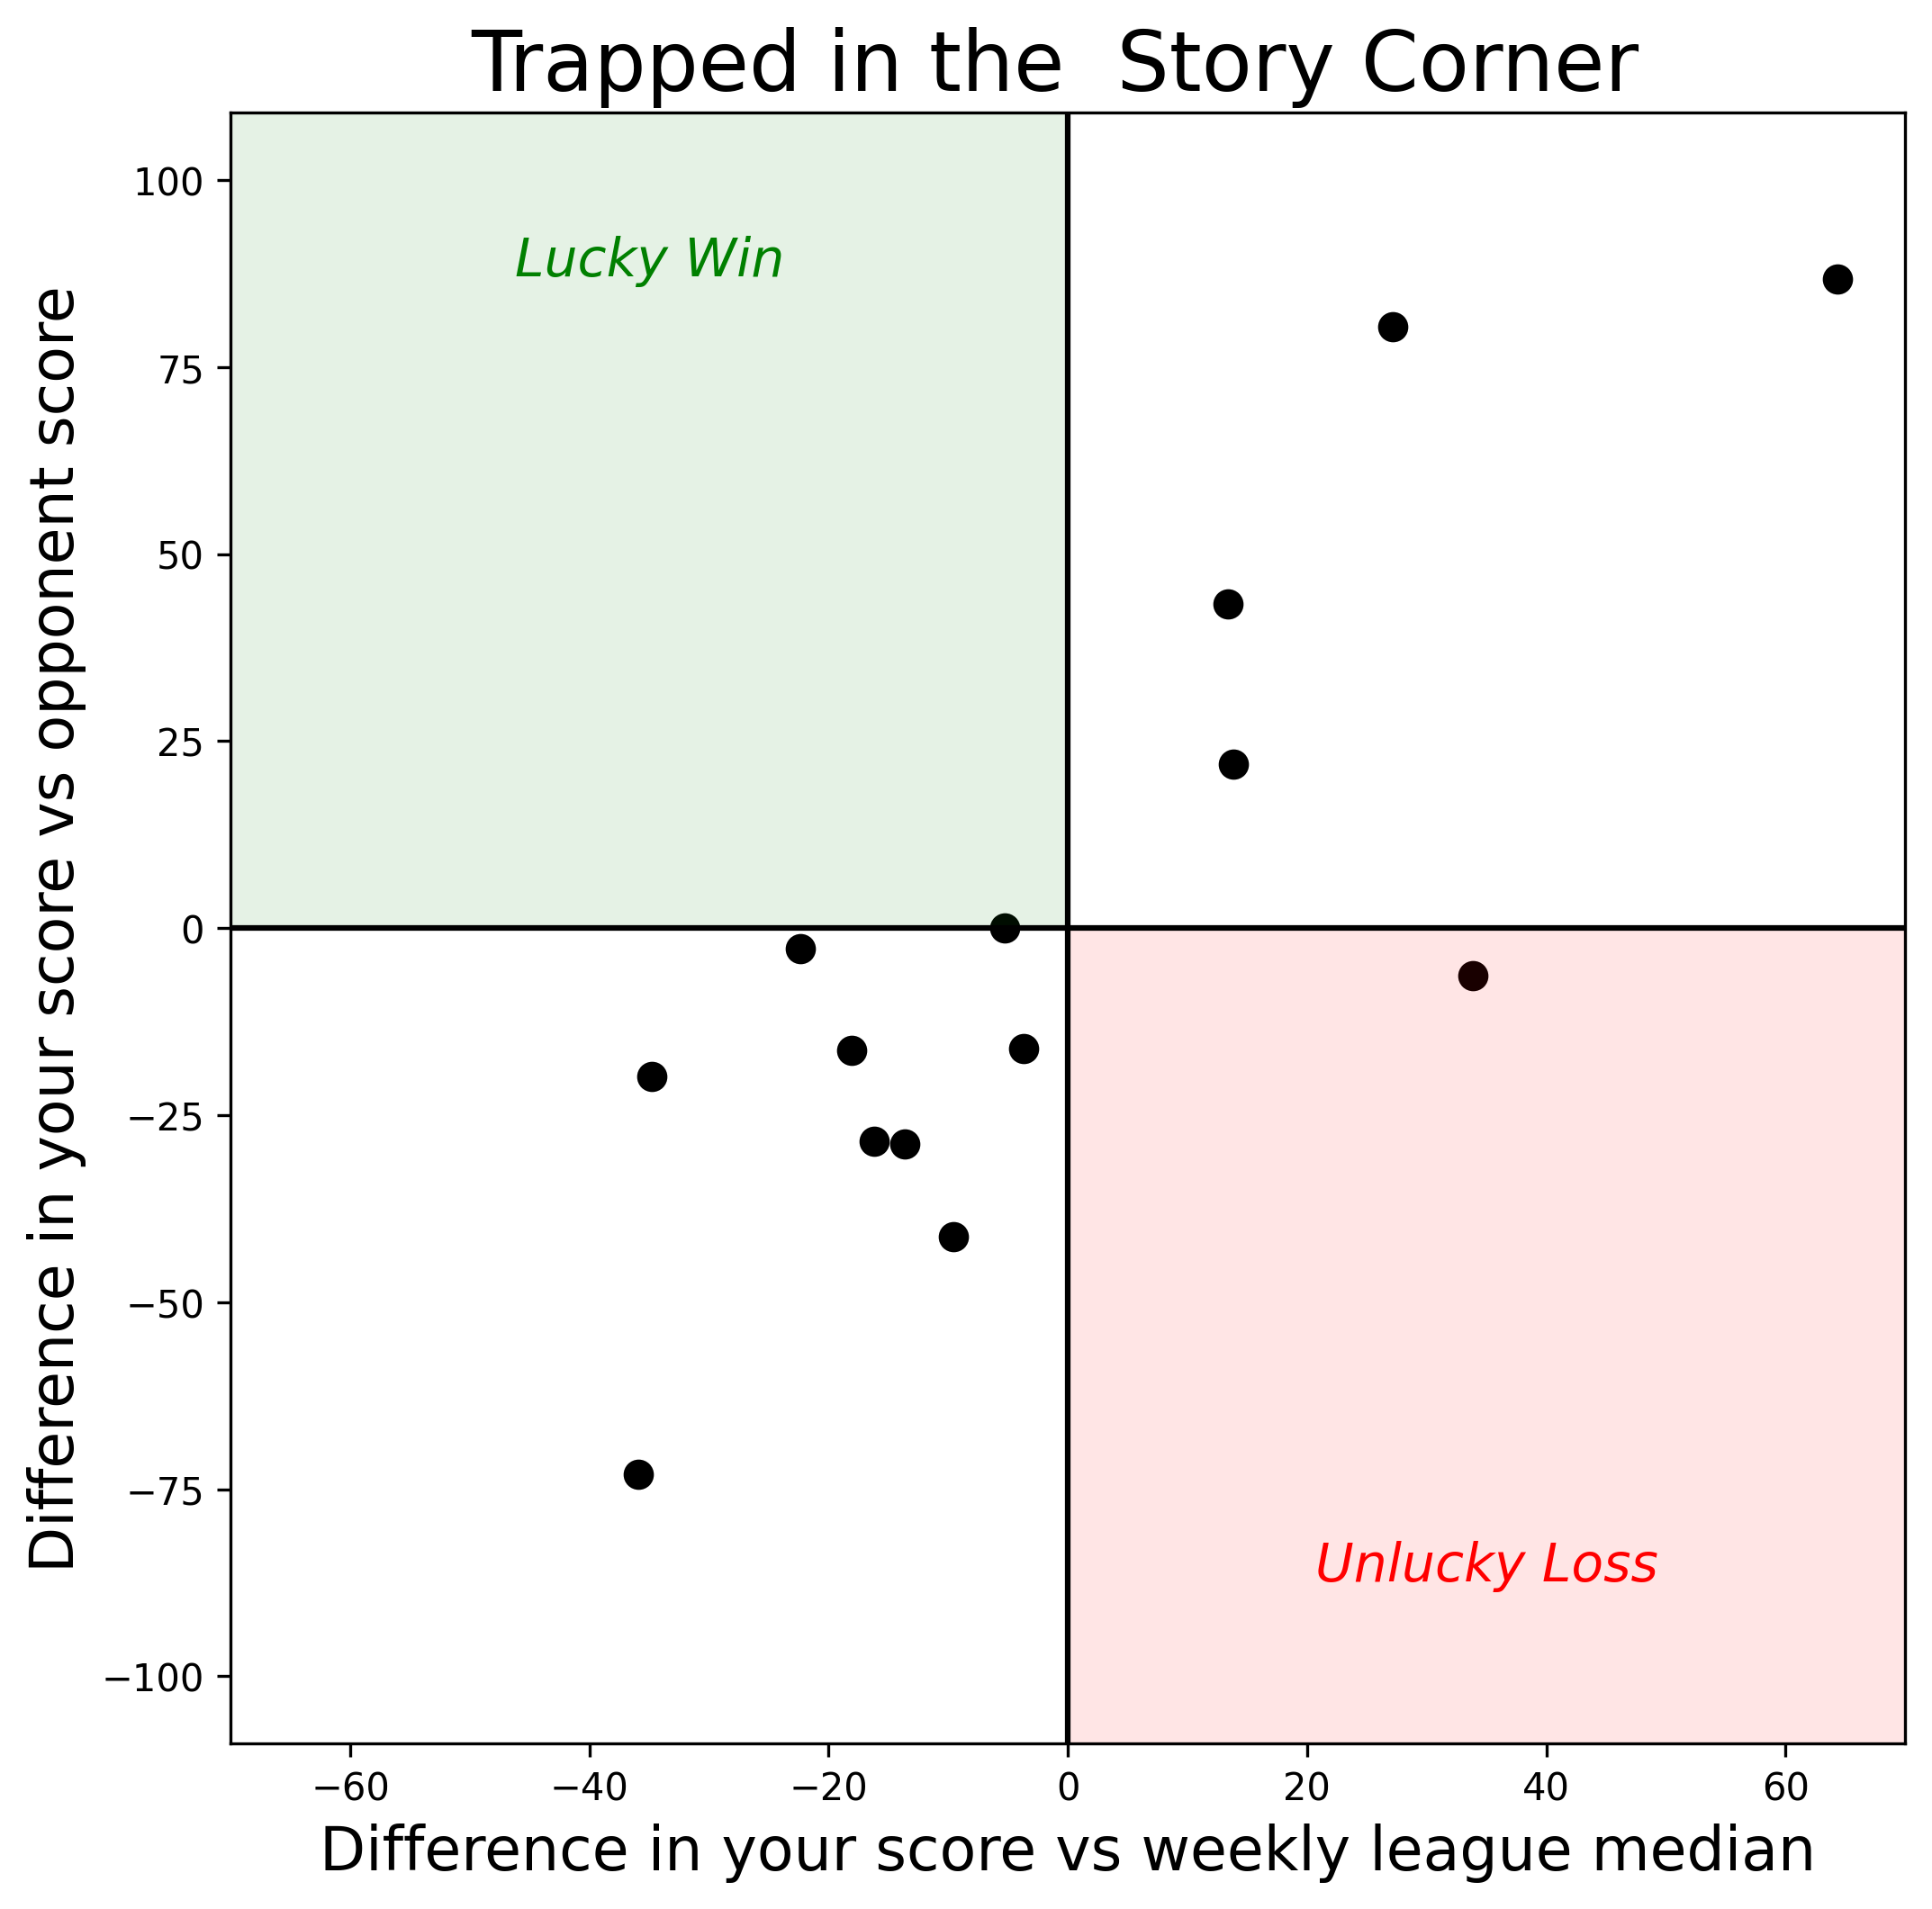

In [7]:
# Plot results

# Unluckly Loss = H2H loss when you were in top half of weekly scorers
# Lucky Win = H2H win when you were in bottom half of weekly scorers

# y axis: difference in your score vs opponent score
# x axis: difference in your score vs league median


x_bound = np.ceil(scores_df.abs().max().max())
y_bound = np.ceil(margins_df.abs().max().max())

for i in range(10):
    x = scores_df.values.tolist()[i]
    y = margins_df.values.tolist()[i]
    
    plt.figure(figsize=[8,8])
    plt.scatter(x, y, color="black", s=50)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.xlim(-x_bound, x_bound)
    plt.ylim(-y_bound, y_bound)
    plt.fill_between([0, -x_bound], 0, y_bound, facecolor='g', alpha=0.1)
    plt.fill_between([0, x_bound], 0, -y_bound, facecolor='r', alpha=0.1)
    plt.annotate("Lucky Win", xy=(-x_bound/2, y_bound*4/5), fontsize=14, ha="center", style="italic", color="g")
    plt.annotate("Unlucky Loss", xy=(x_bound/2, -y_bound*4/5), fontsize=14, ha="center", style="italic", color="r")
    plt.ylabel("Difference in your score vs opponent score", fontsize=16)
    plt.xlabel("Difference in your score vs weekly league median", fontsize=16)
    plt.title(team_map[scores_df.index.values[i]]["name"], fontsize=22)
    